# **Feature Engineering Notebook**

## Objectives

*  Engineer features for Regression 

## Inputs

* inputs/datasets/cleaned/TrainSet.csv
* inputs/datasets/cleaned/TestSet.csv 

## Outputs

* generate a list with variables to engineer

## Conclusions 

Feature Engineering Transformers:

* OrdinalEncoder(encoding_method='arbitrary', variables = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'])

* Numerical Transformation

  * vt.LogTransformer(variables = ['1stFlrSF', 'GrLivArea', 'LotArea', 'LotFrontage'])

  * vt.PowerTransformer(variables = ['2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF']) 

* Winsorizer: ['SalePrice', 'GrLivArea']
  
* SmartCorrelatedSelection - Features to drop: 
['1stFlrSF', 'GarageYrBlt']


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-heritage-housing-issues'

# Load Cleaned Data

Train Set

In [5]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/train_set_cleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head()


1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1828       0.0           3.0           Av          48          Unf   
1       894       0.0           2.0           No           0          Unf   
2       964       0.0           2.0           No         713          ALQ   
3      1689       0.0           3.0           No        1218          GLQ   
4      1541       0.0           3.0           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0       1774         774          Unf       2007.0  ...    11694        90.0   
1        894         308          Unf       1962.0  ...     6600        60.0   
2        163         432          Unf       1921.0  ...    13360        80.0   
3        350         857          RFn       2002.0  ...    13265        69.0   
4       1541         843          RFn       2001.0  ...    13704       118.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       452.0          108            5            9         1822       2007   
1         0.0            0            5            5          894       1962   
2         0.0            0            7            5          876       1921   
3       148.0           59            5            8         1568       2002   
4       150.0           81            5            7         1541       2001   

   YearRemodAdd  SalePrice  
0          2007     314813  
1          1962     109500  
2          2006     163500  
3          2002     271000  
4          2002     205000  

[5 rows x 22 columns]

---

Test Set

In [6]:
test_set_path = 'outputs/datasets/cleaned/test_set_cleaned.csv'
TestSet = pd.read_csv(test_set_path)
TestSet.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      2515       0.0           4.0           No        1219          Rec   
1       958     620.0           3.0           No         403          BLQ   
2       979     224.0           3.0           No         185          LwQ   
3      1156     866.0           4.0           No         392          BLQ   
4       525       0.0           3.0           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        816         484          Unf       1975.0  ...    32668        69.0   
1        238         240          Unf       1941.0  ...     9490        79.0   
2        524         352          Unf       1950.0  ...     7015        69.0   
3        768         505          Fin       1977.0  ...    10005        83.0   
4        525         264          Unf       1971.0  ...     1680        21.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         0.0            0            3            6         2035       1957   
1         0.0            0            7            6          806       1941   
2       161.0            0            4            5          709       1950   
3       299.0          117            5            7         1160       1977   
4       381.0            0            5            6          525       1971   

   YearRemodAdd  SalePrice  
0          1975     200624  
1          1950     133000  
2          1950     110000  
3          1977     192000  
4          1971      88000  

[5 rows x 22 columns]

# Data Exploration

In [7]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Analysis and PPS Analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
%matplotlib inline



def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)


##### Calculate Correlations and Power Predictive Score

In [12]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(TrainSet)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.059  0.105  0.0  0.0  0.0  0.075  0.618


##### Display at Heatmaps



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



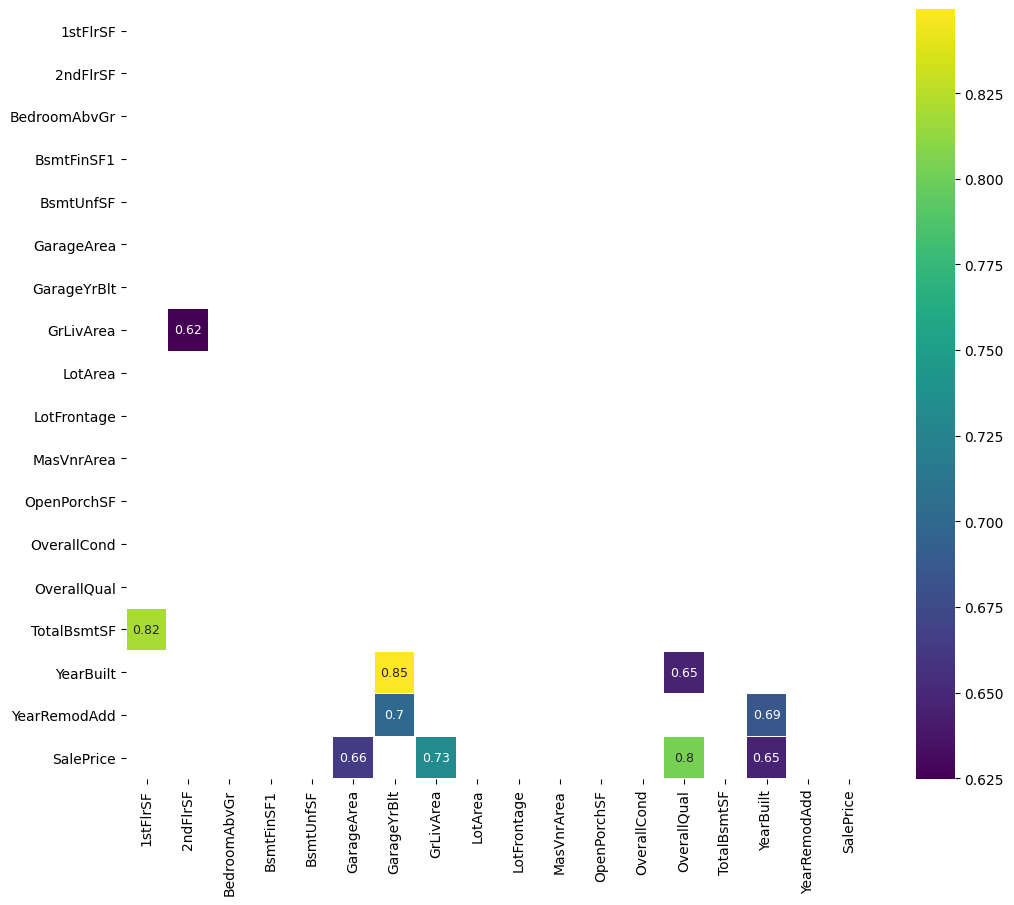



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



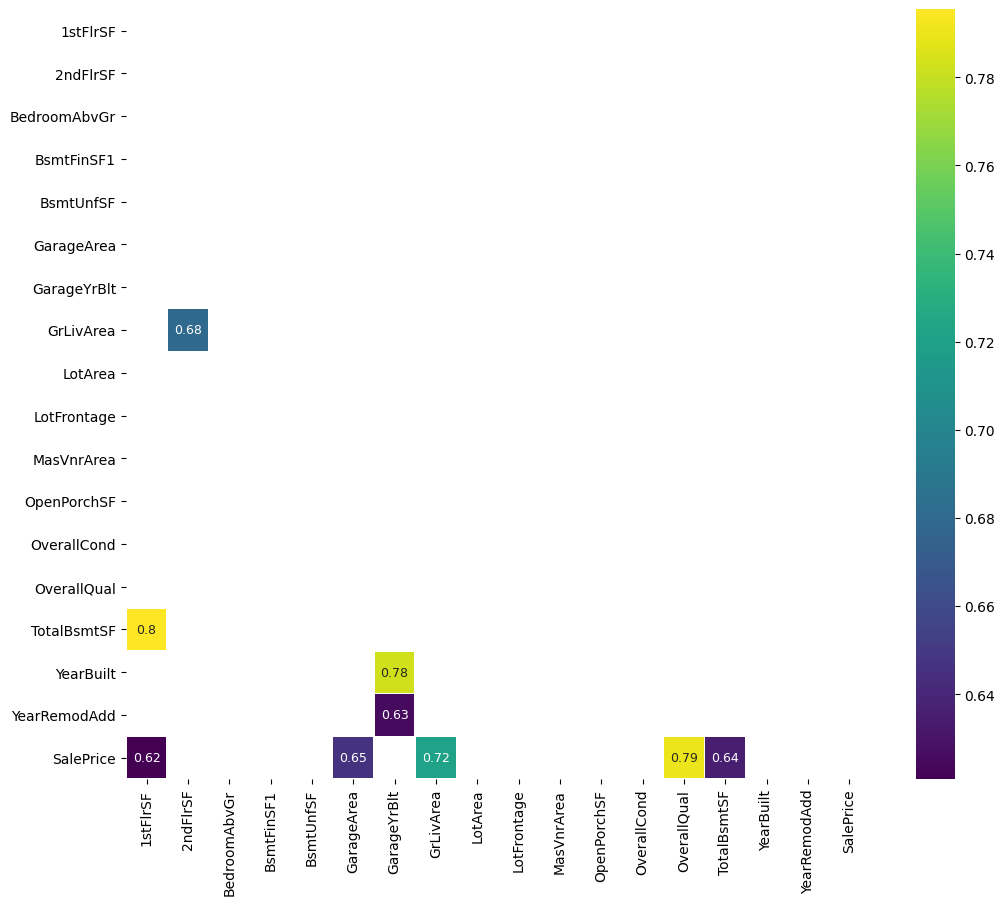



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



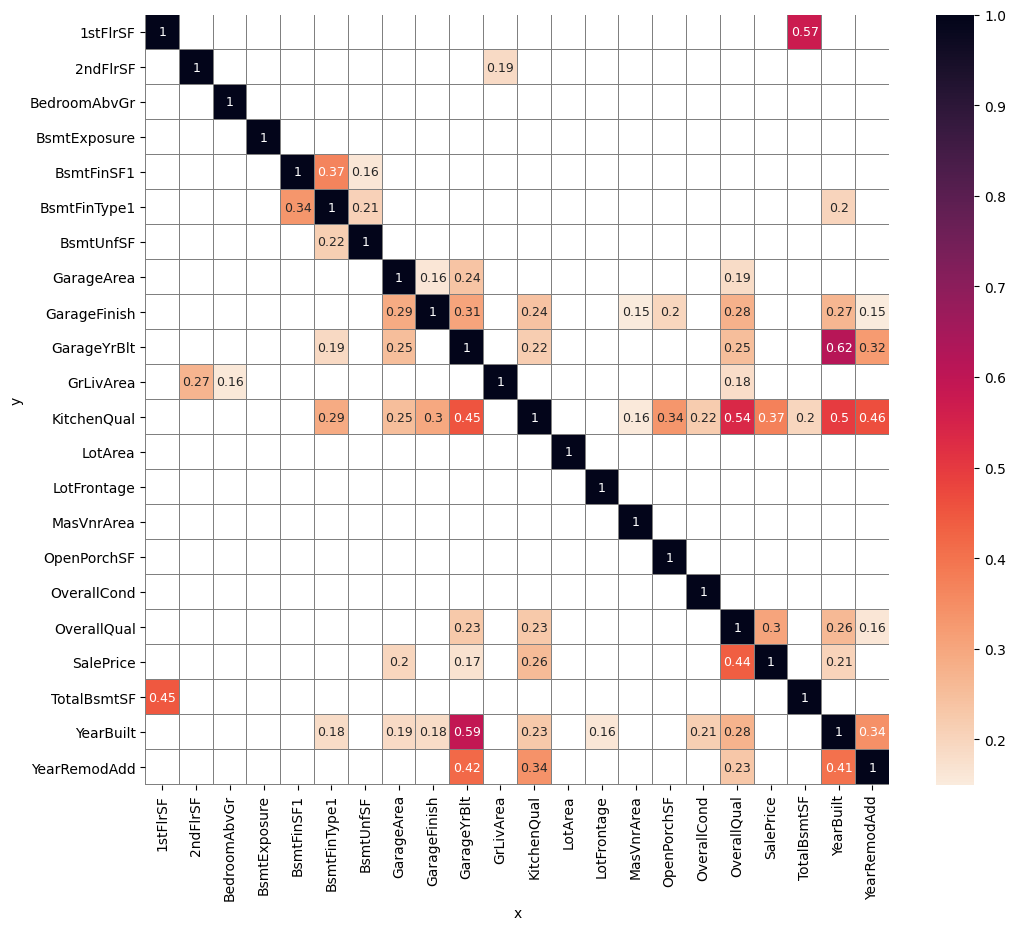

In [13]:
%matplotlib inline
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.6, PPS_Threshold =0.15,
                  figsize=(12,10), font_annot=9)

## Custom Functions

We will use the following custom function from [Code Institute](https://codeinstitute.net/se/). This function will help quick feature engineering on numerical and categorical variables to decide which transformation can better transform the distribution shape.

In [14]:
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')



def FeatureEngineeringAnalysis(df,analysis_type=None):


  """
  - used for quick feature engineering on numerical and categorical variables
  to decide which transformation can better transform the distribution shape 
  - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions

  """
  check_missing_values(df)
  allowed_types= ['numerical', 'ordinal_encoder',  'outlier_winsorizer']
  check_user_entry_on_analysis_type(analysis_type, allowed_types)
  list_column_transformers = define_list_column_transformers(analysis_type)
  
  
  # Loop in each variable and engineer the data according to the analysis type
  df_feat_eng = pd.DataFrame([])
  for column in df.columns:
    # create additional columns (column_method) to apply the methods
    df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
    for method in list_column_transformers:
      df_feat_eng[f"{column}_{method}"] = df[column]
      
    # Apply transformers in respectives column_transformers
    df_feat_eng,list_applied_transformers = apply_transformers(analysis_type, df_feat_eng, column)

    # For each variable, assess how the transformations perform
    transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng)

  return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
  ### Check analyis type
  if analysis_type == None:
    raise SystemExit(f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
  if analysis_type not in allowed_types:
      raise SystemExit(f"analysis_type argument should be one of these options: {allowed_types}")

def check_missing_values(df):
  if df.isna().sum().sum() != 0:
    raise SystemExit(
        f"There is missing value in your dataset. Please handle that before getting into feature engineering.")



def define_list_column_transformers(analysis_type):
  ### Set suffix colummns acording to analysis_type
  if analysis_type=='numerical':
    list_column_transformers = ["log_e","log_10","reciprocal", "power","box_cox","yeo_johnson"]
  
  elif analysis_type=='ordinal_encoder':
    list_column_transformers = ["ordinal_encoder"]

  elif analysis_type=='outlier_winsorizer':
    list_column_transformers = ['iqr']

  return list_column_transformers



def apply_transformers(analysis_type, df_feat_eng, column):


  for col in df_feat_eng.select_dtypes(include='category').columns:
    df_feat_eng[col] = df_feat_eng[col].astype('object')


  if analysis_type=='numerical':
    df_feat_eng,list_applied_transformers = FeatEngineering_Numerical(df_feat_eng,column)
  
  elif analysis_type=='outlier_winsorizer':
    df_feat_eng,list_applied_transformers = FeatEngineering_OutlierWinsorizer(df_feat_eng,column)

  elif analysis_type=='ordinal_encoder':
    df_feat_eng,list_applied_transformers = FeatEngineering_CategoricalEncoder(df_feat_eng,column)

  return df_feat_eng,list_applied_transformers



def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
  # For each variable, assess how the transformations perform
  print(f"* Variable Analyzed: {column}")
  print(f"* Applied transformation: {list_applied_transformers} \n")
  for col in [column] + list_applied_transformers:
    
    if analysis_type!='ordinal_encoder':
      DiagnosticPlots_Numerical(df_feat_eng, col)
    
    else:
      if col == column: 
        DiagnosticPlots_Categories(df_feat_eng, col)
      else:
        DiagnosticPlots_Numerical(df_feat_eng, col)

    print("\n")



def DiagnosticPlots_Categories(df_feat_eng, col):
  plt.figure(figsize=(4, 3))
  sns.countplot(data=df_feat_eng, x=col,palette=['#432371'],order = df_feat_eng[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.suptitle(f"{col}", fontsize=30,y=1.05)        
  plt.show()
  print("\n")



def DiagnosticPlots_Numerical(df, variable):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  sns.histplot(data=df, x=variable, kde=True,element="step",ax=axes[0]) 
  stats.probplot(df[variable], dist="norm", plot=axes[1])
  sns.boxplot(x=df[variable],ax=axes[2])
  
  axes[0].set_title('Histogram')
  axes[1].set_title('QQ Plot')
  axes[2].set_title('Boxplot')
  fig.suptitle(f"{variable}", fontsize=30,y=1.05)
  plt.tight_layout()
  plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng,column):
  list_methods_worked = []
  try:  
    encoder= OrdinalEncoder(encoding_method='arbitrary', variables = [f"{column}_ordinal_encoder"])
    df_feat_eng = encoder.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_ordinal_encoder")
  
  except: 
    df_feat_eng.drop([f"{column}_ordinal_encoder"],axis=1,inplace=True)
    
  return df_feat_eng,list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng,column):
  list_methods_worked = []

  ### Winsorizer iqr
  try: 
    disc=Winsorizer(
        capping_method='iqr', tail='both', fold=1.5, variables = [f"{column}_iqr"])
    df_feat_eng = disc.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_iqr")
  except: 
    df_feat_eng.drop([f"{column}_iqr"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked




def FeatEngineering_Numerical(df_feat_eng,column):

  list_methods_worked = []

  ### LogTransformer base e
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_e"])
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_e")
  except: 
    df_feat_eng.drop([f"{column}_log_e"],axis=1,inplace=True)

    ### LogTransformer base 10
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_10"],base='10')
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_10")
  except: 
    df_feat_eng.drop([f"{column}_log_10"],axis=1,inplace=True)

  ### ReciprocalTransformer
  try:
    rt = vt.ReciprocalTransformer(variables = [f"{column}_reciprocal"])
    df_feat_eng =  rt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_reciprocal")
  except:
    df_feat_eng.drop([f"{column}_reciprocal"],axis=1,inplace=True)

  ### PowerTransformer
  try:
    pt = vt.PowerTransformer(variables = [f"{column}_power"])
    df_feat_eng = pt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_power")
  except:
    df_feat_eng.drop([f"{column}_power"],axis=1,inplace=True)

  ### BoxCoxTransformer
  try:
    bct = vt.BoxCoxTransformer(variables = [f"{column}_box_cox"])
    df_feat_eng = bct.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_box_cox")
  except:
    df_feat_eng.drop([f"{column}_box_cox"],axis=1,inplace=True)


  ### YeoJohnsonTransformer
  try:
    yjt = vt.YeoJohnsonTransformer(variables = [f"{column}_yeo_johnson"])
    df_feat_eng = yjt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_yeo_johnson")
  except:
        df_feat_eng.drop([f"{column}_yeo_johnson"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked

## Dealing with Feature Engineering

#### `Categorical Encoding`: 

Replaces categories with ordinal numbers 

* Step 1: Select variable(s)

In [15]:
variables_engineering= ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
variables_engineering

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

* Step 2: Create a separate DataFrame, with your variable(s)

In [16]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head()

BsmtExposure BsmtFinType1 GarageFinish KitchenQual
0           Av          Unf          Unf          Gd
1           No          Unf          Unf          TA
2           No          ALQ          Unf          TA
3           No          GLQ          RFn          Gd
4           No          Unf          RFn          Gd

* Step 3: Create engineered variables(s) by applying the transformation(s), assess engineered variables distribution and select the most suitable method for each variable.

* Variable Analyzed: BsmtExposure
* Applied transformation: ['BsmtExposure_ordinal_encoder'] 



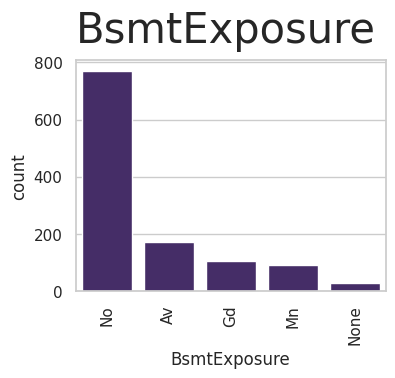

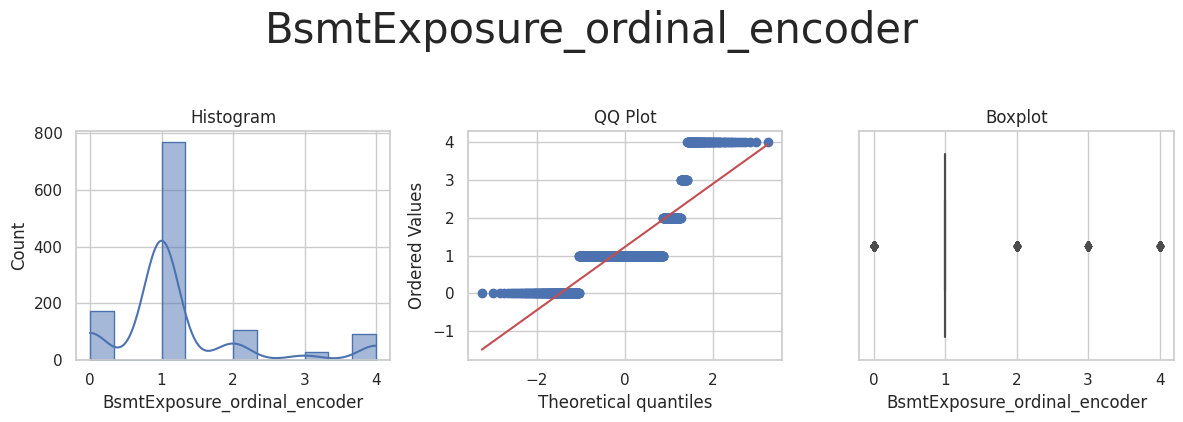



* Variable Analyzed: BsmtFinType1
* Applied transformation: ['BsmtFinType1_ordinal_encoder'] 



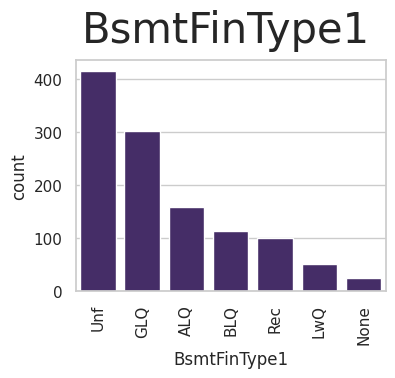

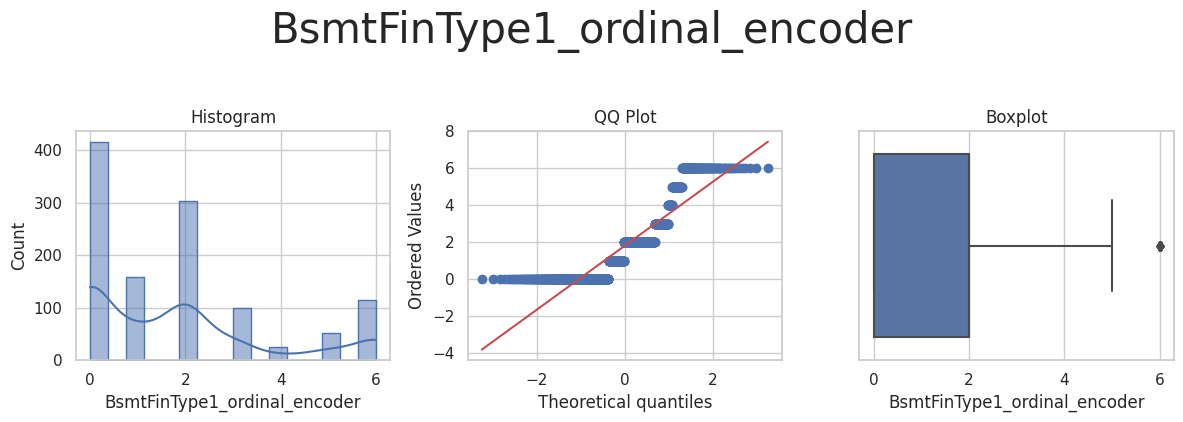



* Variable Analyzed: GarageFinish
* Applied transformation: ['GarageFinish_ordinal_encoder'] 



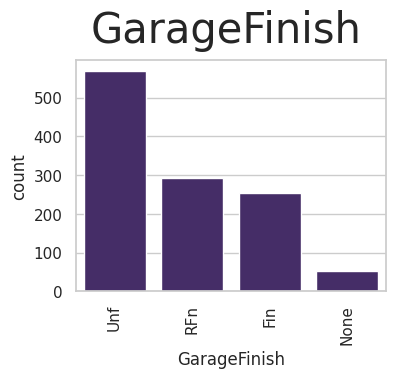

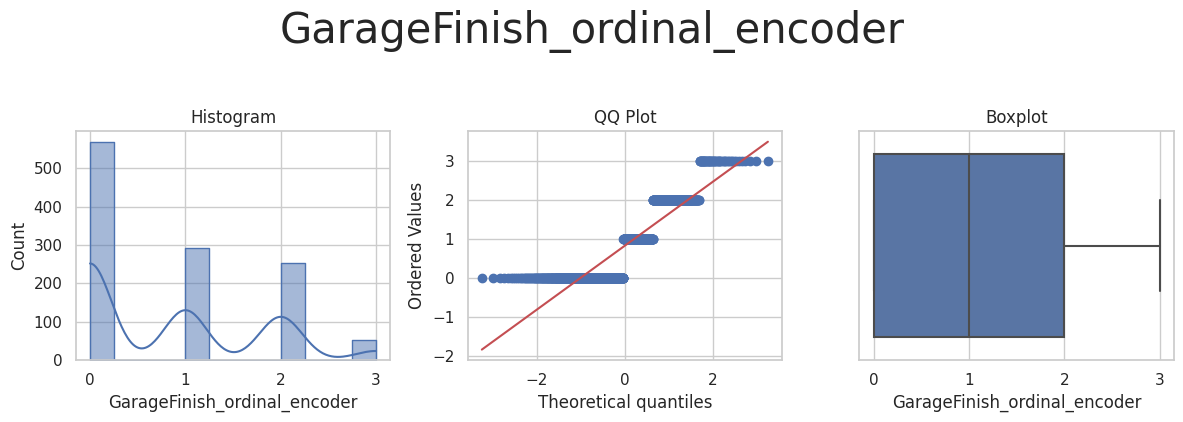



* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_ordinal_encoder'] 



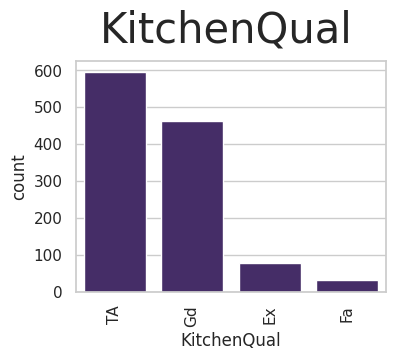

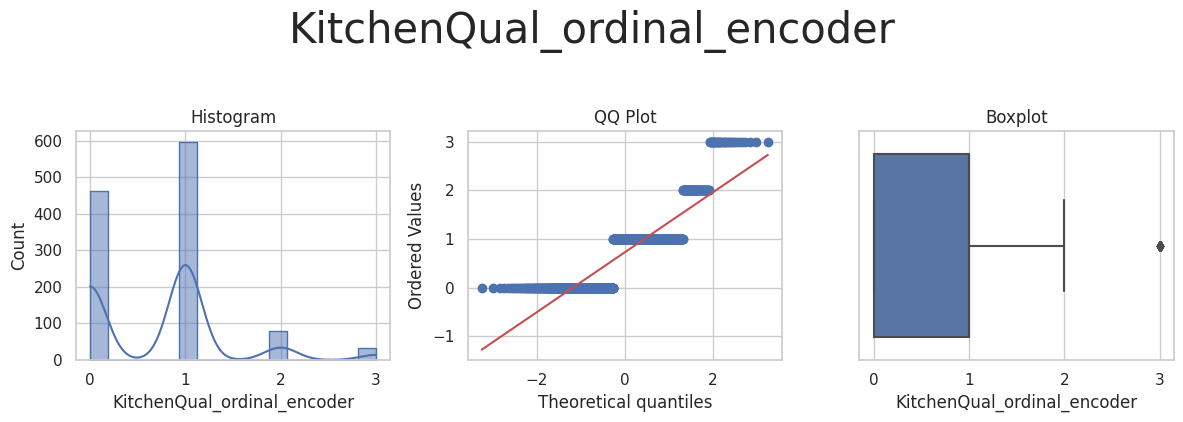

In [17]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='ordinal_encoder')

All the variables have been converted to numbers.

* Step 4 - Apply the selected transformation to the Train and Test set

In [2]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables = variables_engineering)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

NameError: name 'OrdinalEncoder' is not defined

#### `Numerical Transformation`

We will apply numerical transformation to normalize the data finding a better distribution taking into consideration the amount of zeros these variables contain and the importance of keeping a balance. 

* Step 1: Select variable(s)

In [19]:
variables_engineering = ['1stFlrSF', 
                    '2ndFlrSF', 
                    'BsmtFinSF1', 
                    'BsmtUnfSF', 
                    'GarageArea', 
                    'GrLivArea', 
                    'LotArea', 
                    'LotFrontage', 
                    'MasVnrArea', 
                    'OpenPorchSF', 
                    'TotalBsmtSF'
                    ]
variables_engineering

['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'TotalBsmtSF']

* Step 2: Create a separate dataframe, with your variable(s)

In [20]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(3)

1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtUnfSF  GarageArea  GrLivArea  LotArea  \
0      1828       0.0          48       1774         774       1828    11694   
1       894       0.0           0        894         308        894     6600   
2       964       0.0         713        163         432        964    13360   

   LotFrontage  MasVnrArea  OpenPorchSF  TotalBsmtSF  
0         90.0       452.0          108         1822  
1         60.0         0.0            0          894  
2         80.0         0.0            0          876

* Step 3: Create engineered variables(s) apply the transformation(s), assess engineered variables distribution and select most suitable method

* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_log_e', '1stFlrSF_log_10', '1stFlrSF_reciprocal', '1stFlrSF_power', '1stFlrSF_box_cox', '1stFlrSF_yeo_johnson'] 



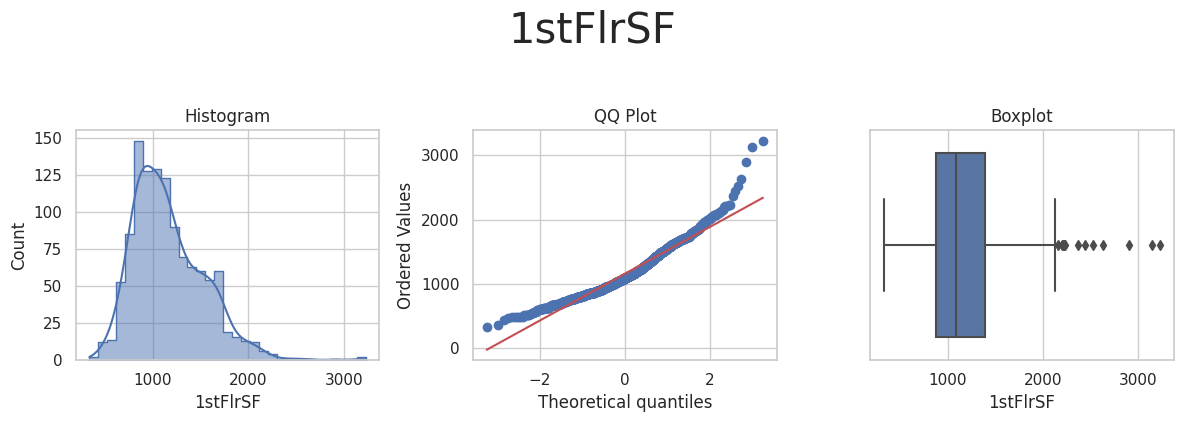

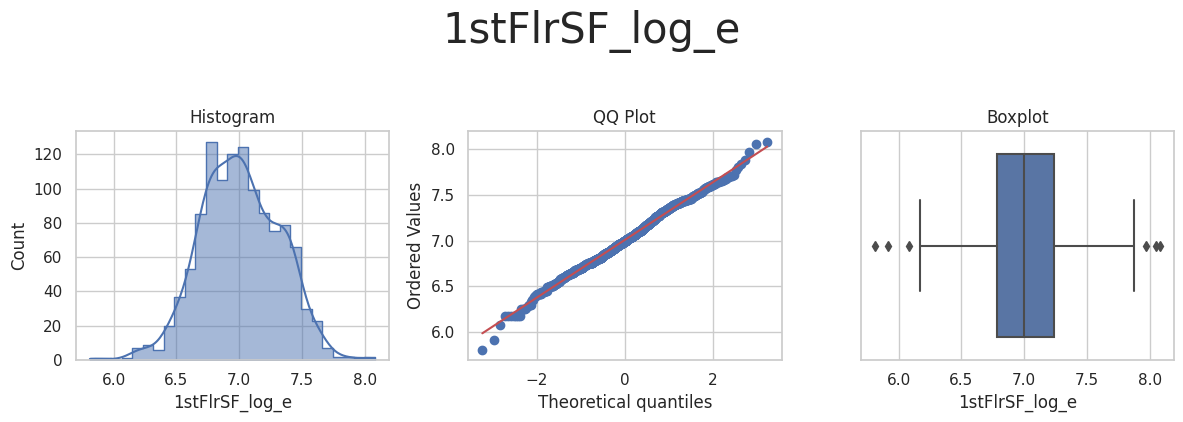

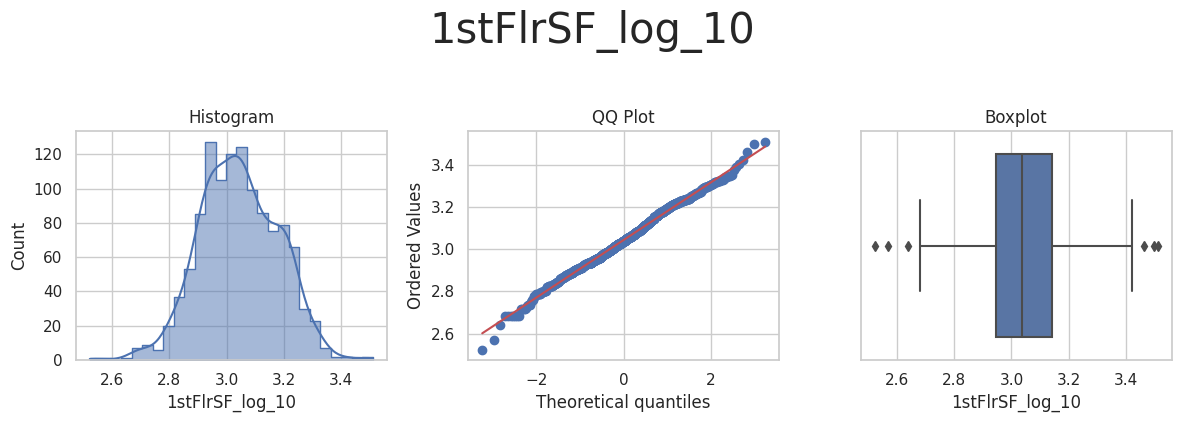

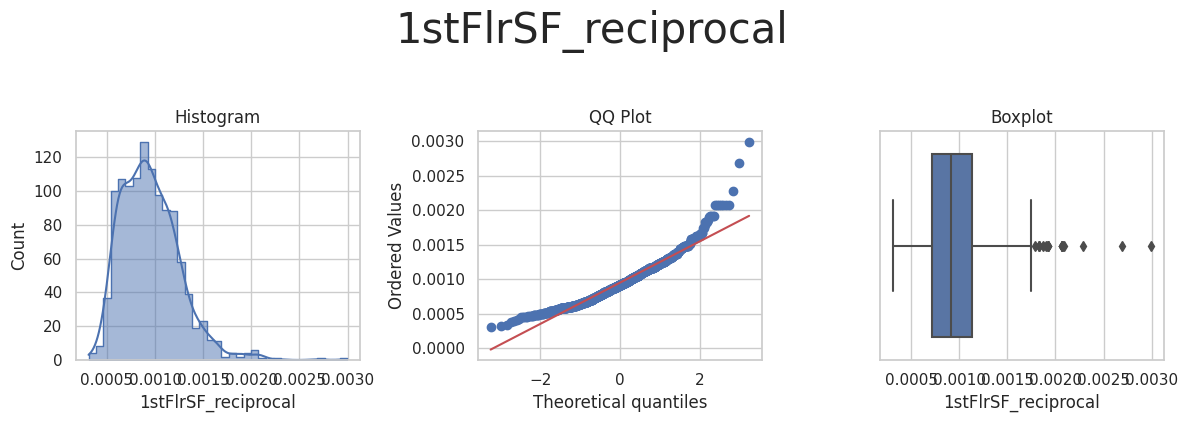

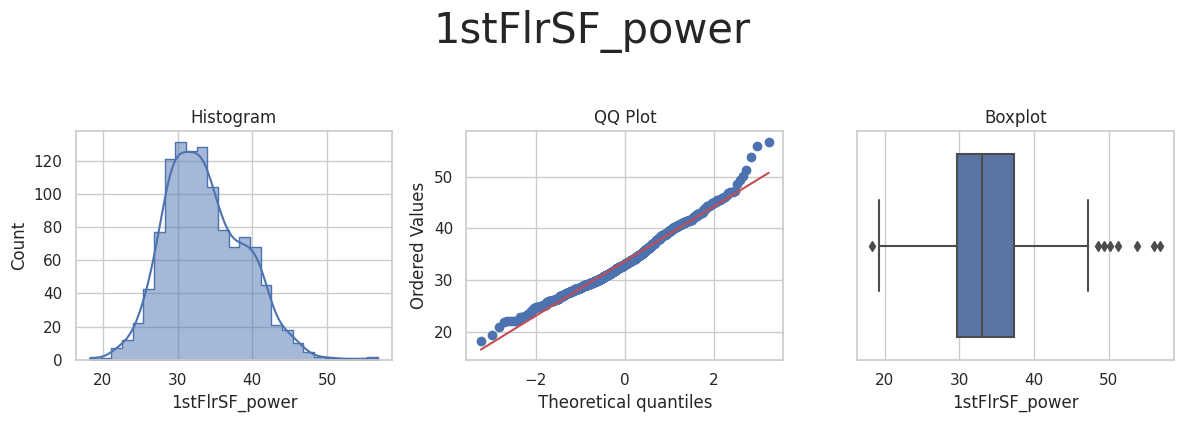

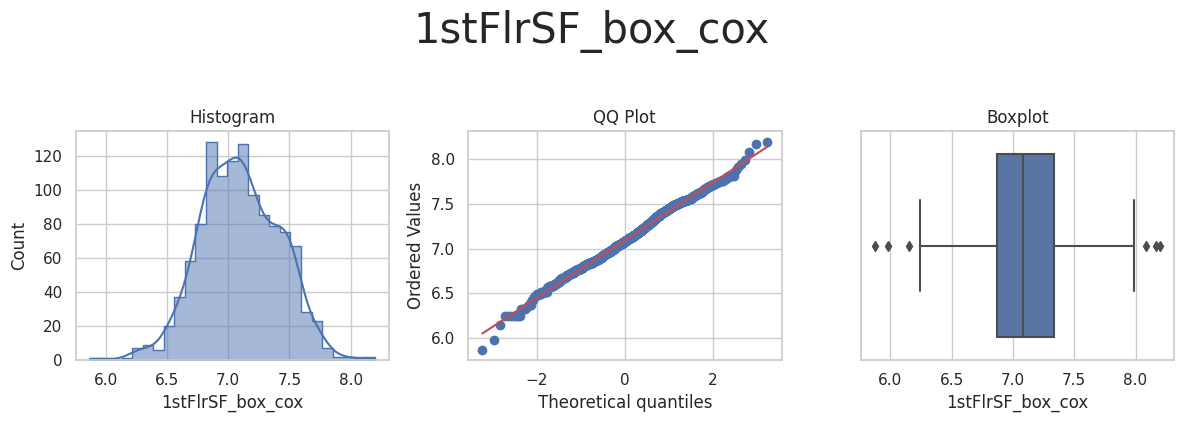

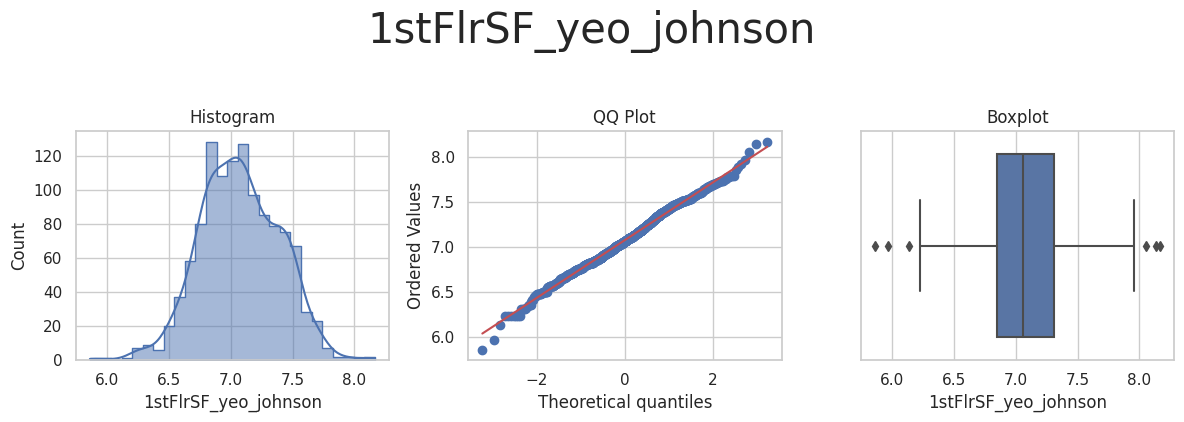



* Variable Analyzed: 2ndFlrSF
* Applied transformation: ['2ndFlrSF_power', '2ndFlrSF_yeo_johnson'] 



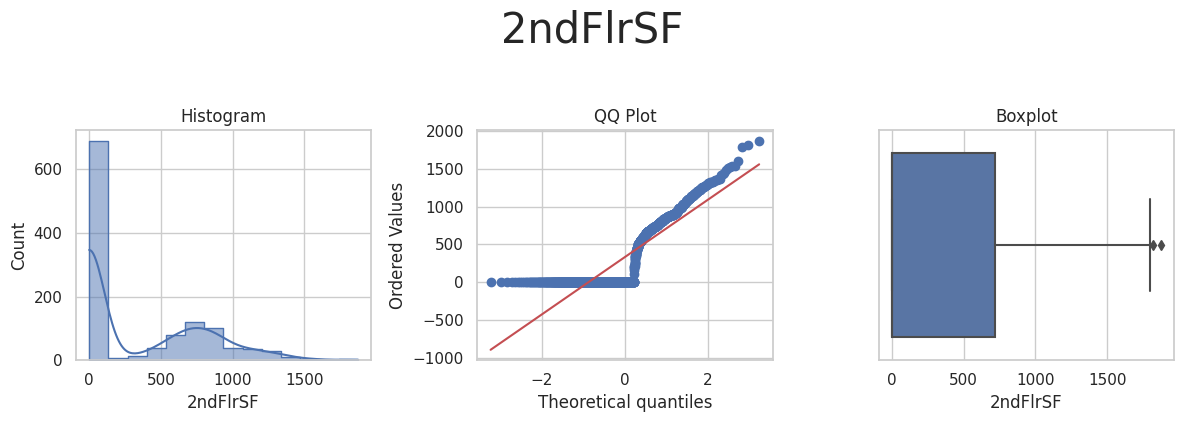

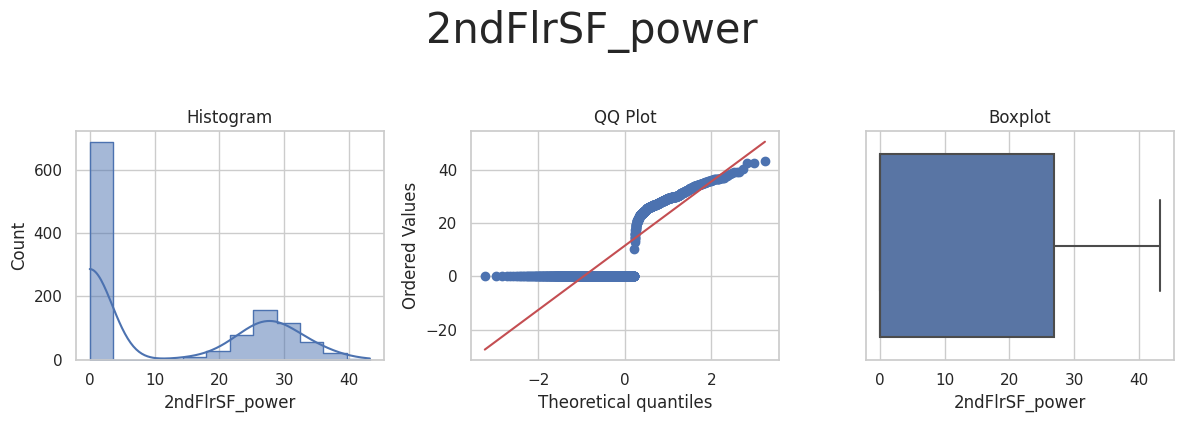

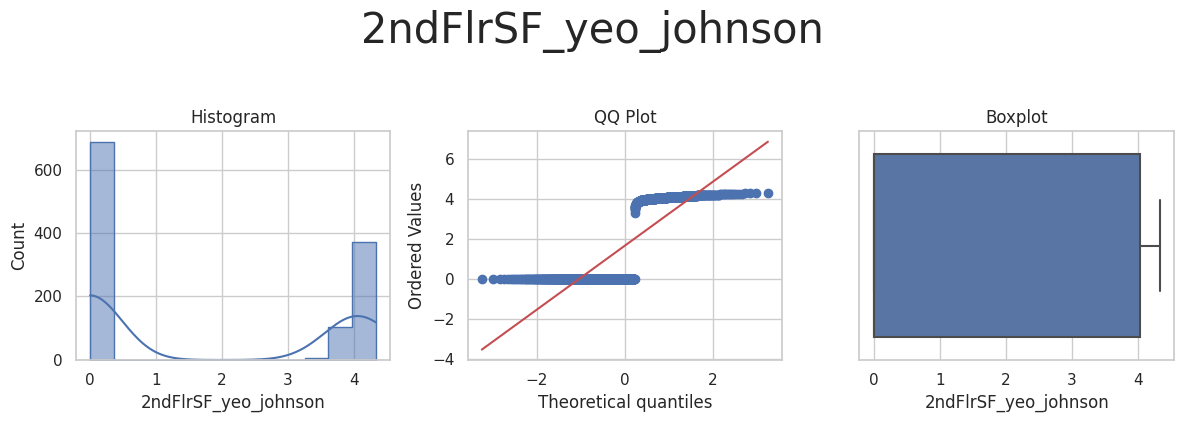



* Variable Analyzed: BsmtFinSF1
* Applied transformation: ['BsmtFinSF1_power', 'BsmtFinSF1_yeo_johnson'] 



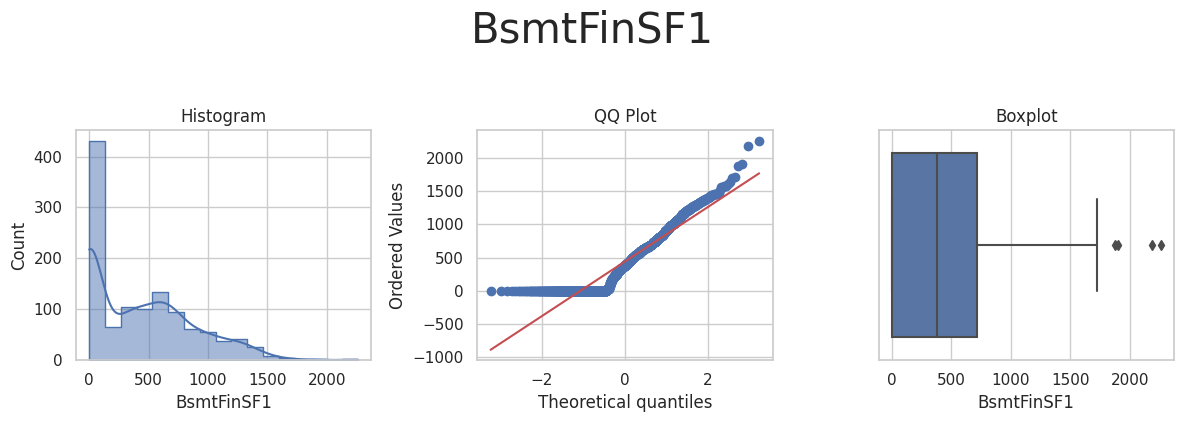

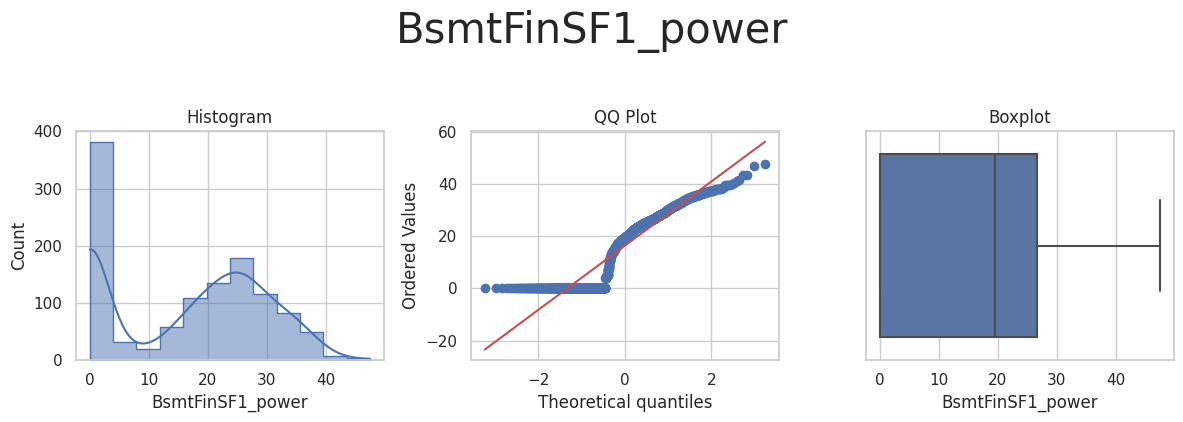

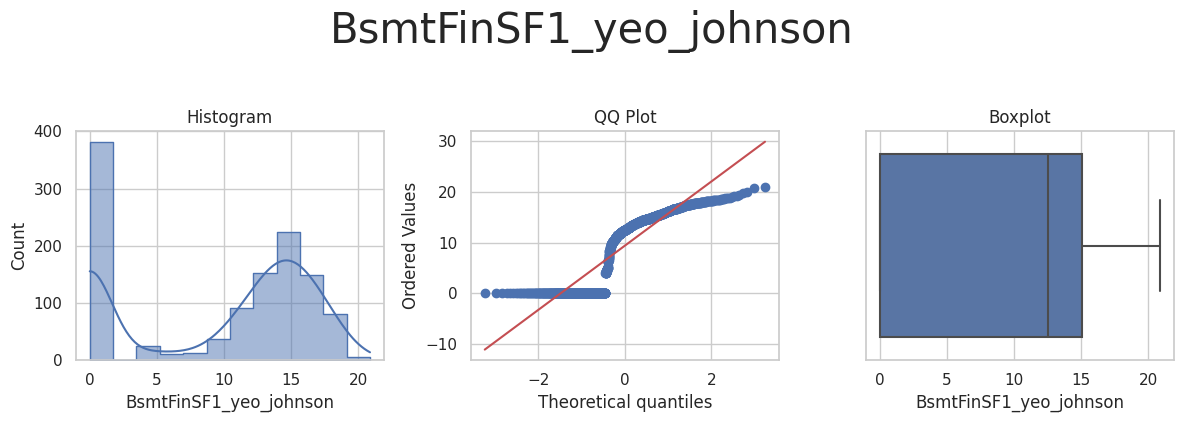



* Variable Analyzed: BsmtUnfSF
* Applied transformation: ['BsmtUnfSF_power', 'BsmtUnfSF_yeo_johnson'] 



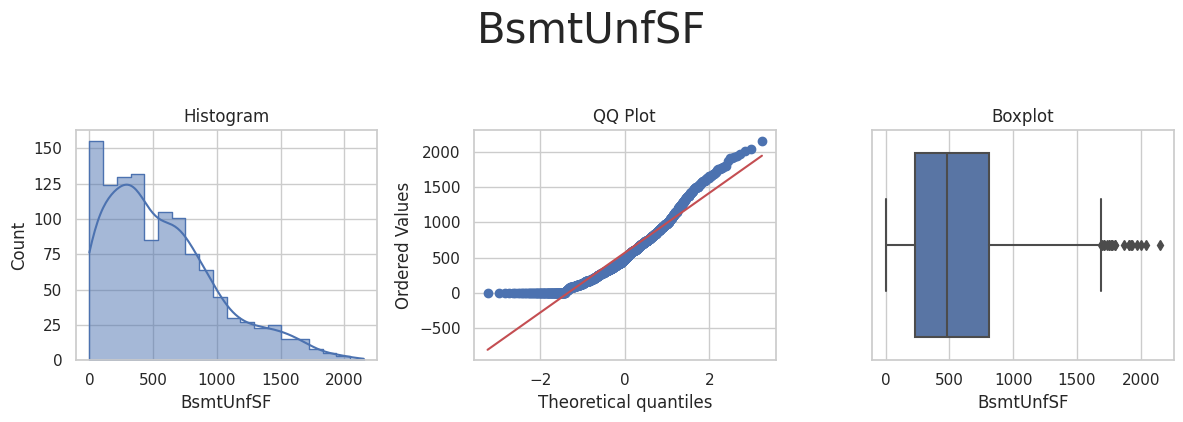

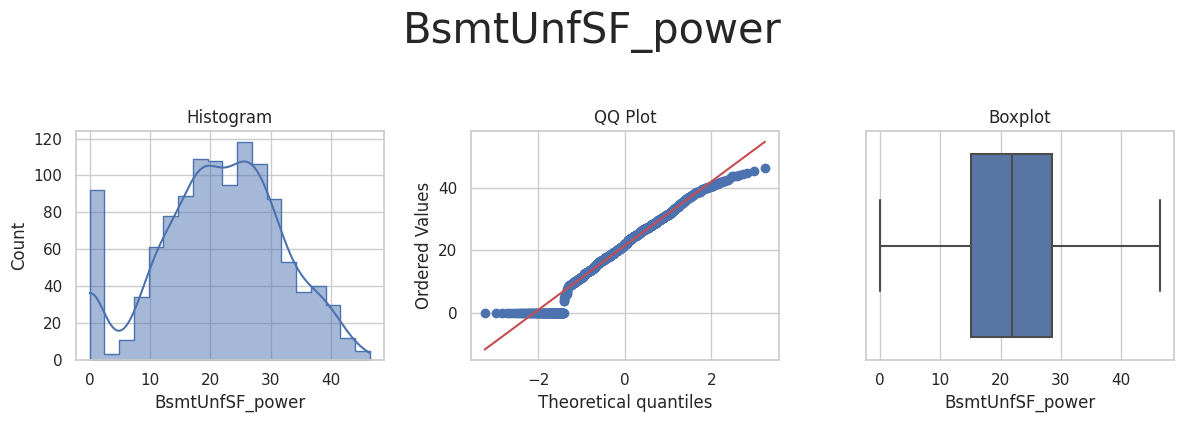

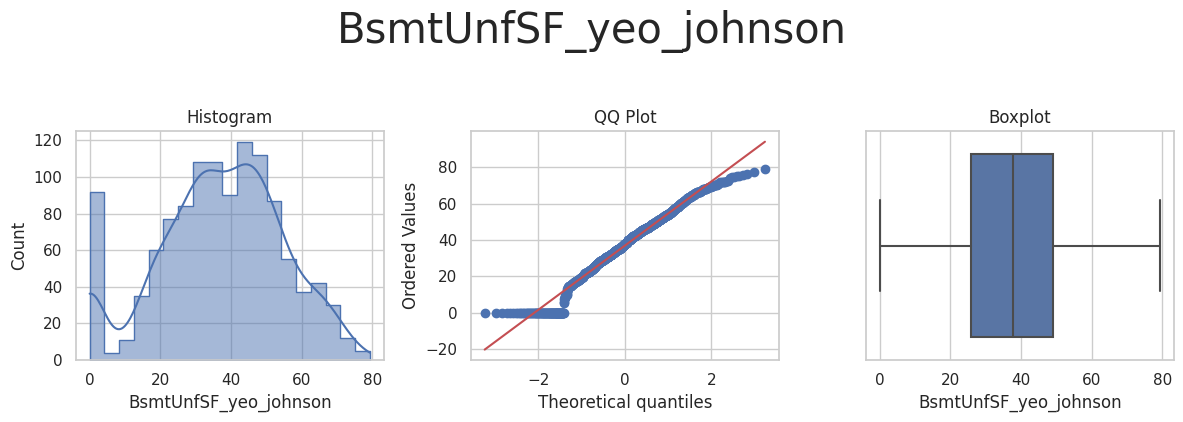



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_power', 'GarageArea_yeo_johnson'] 



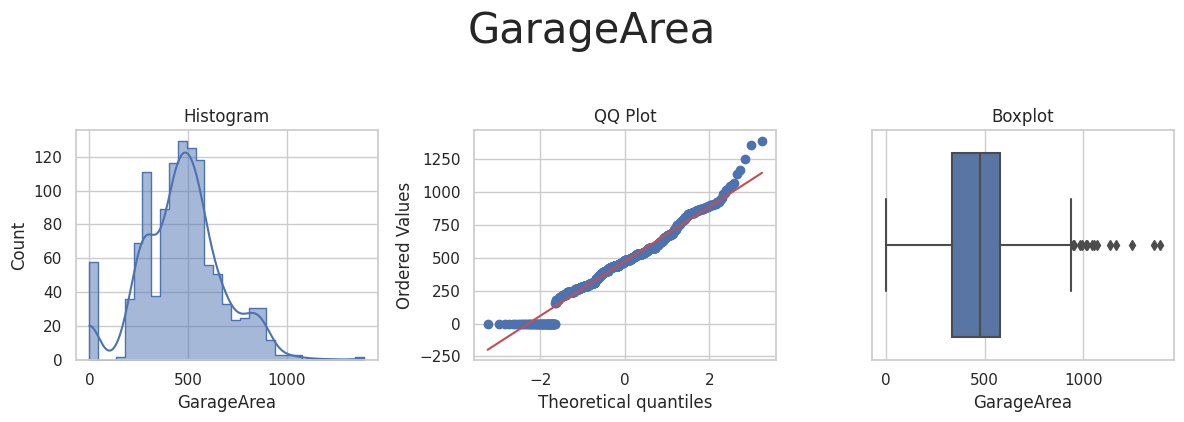

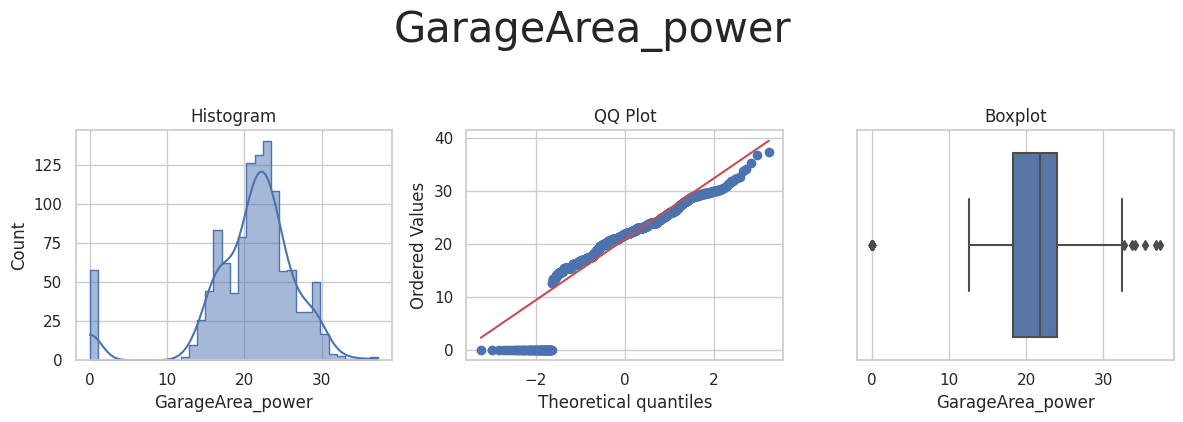

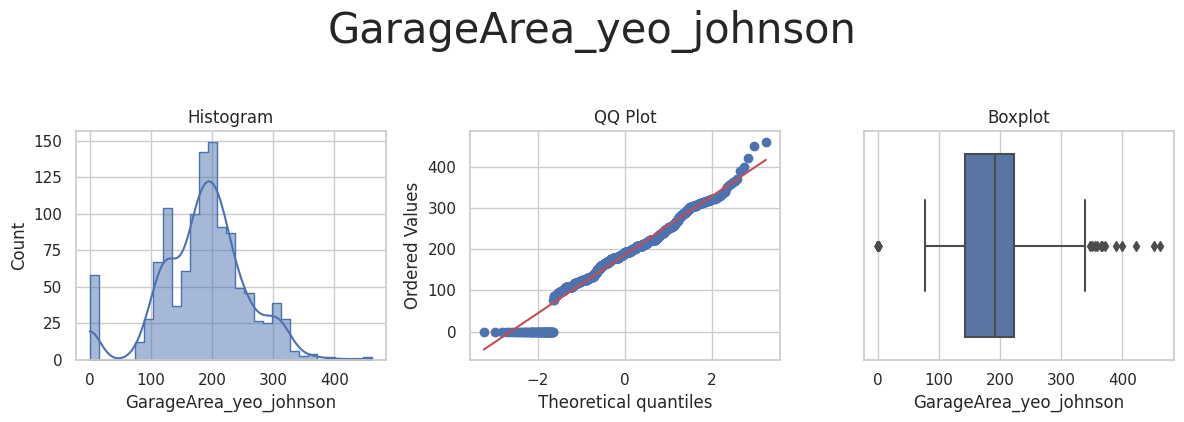



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson'] 



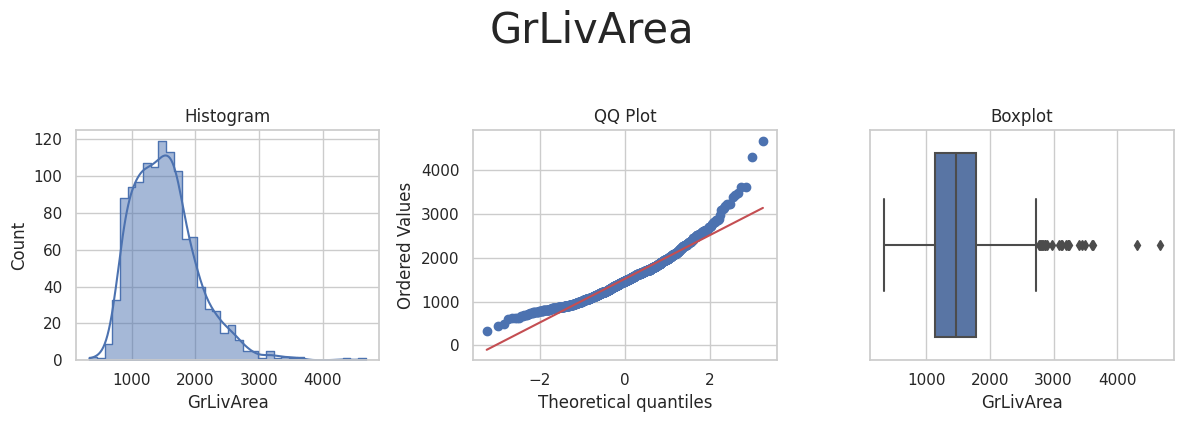

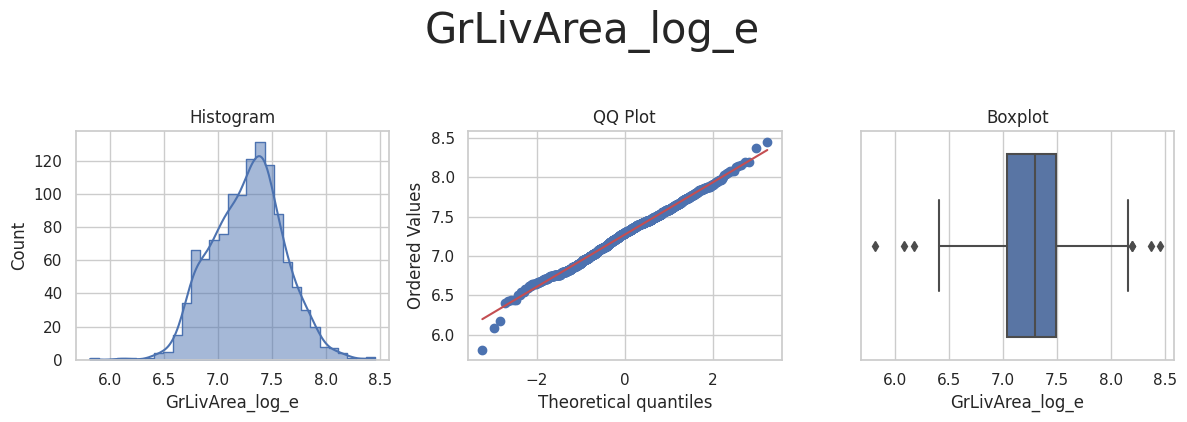

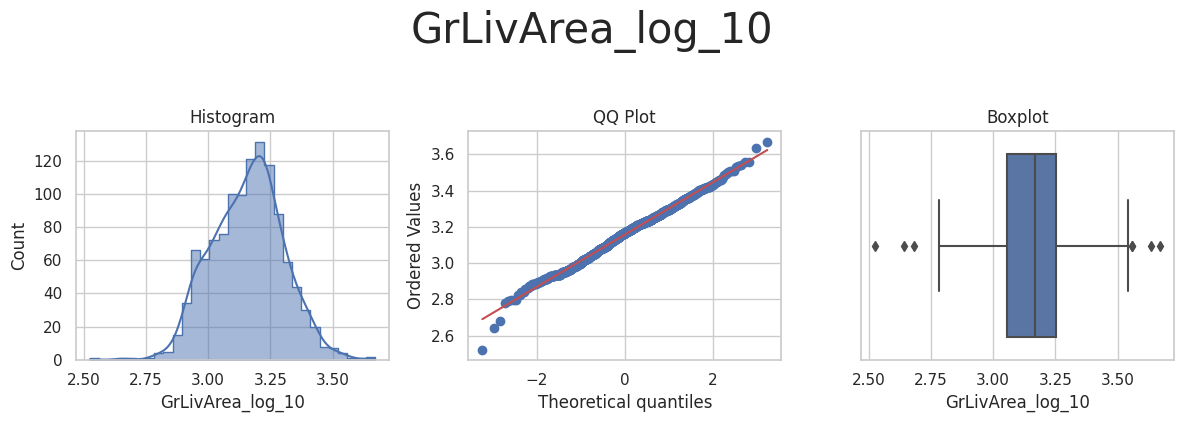

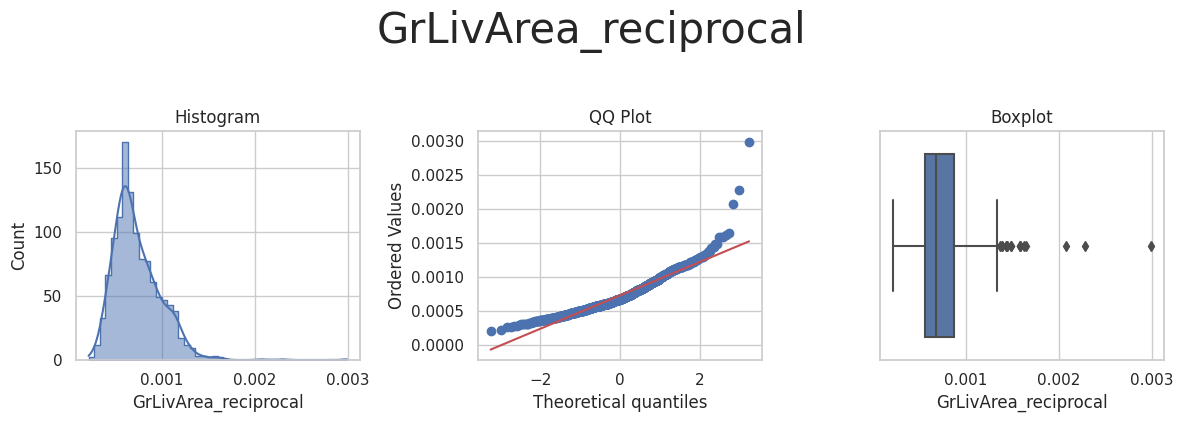

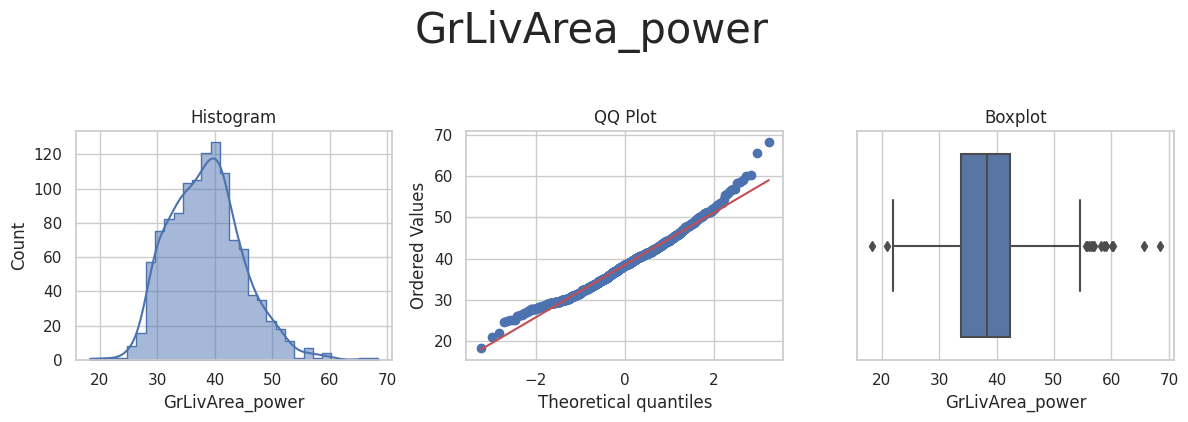

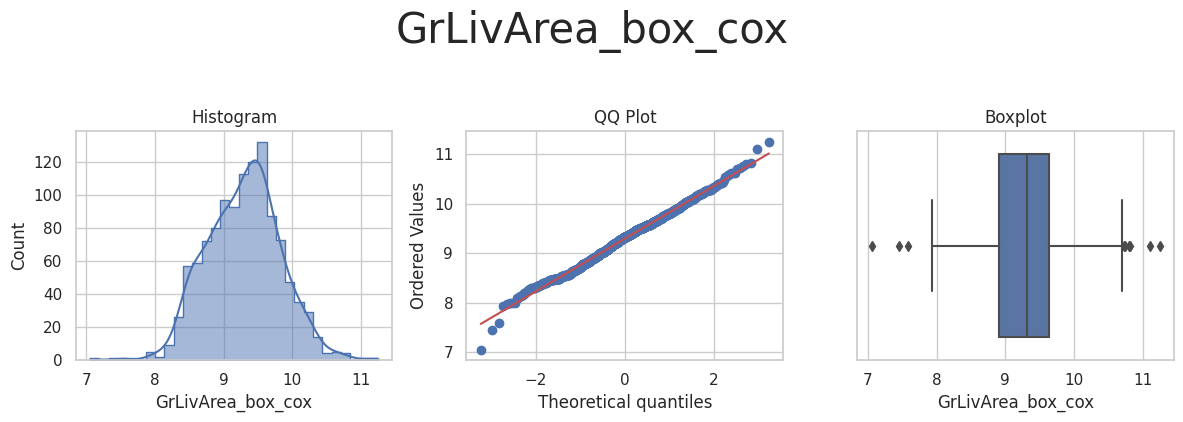

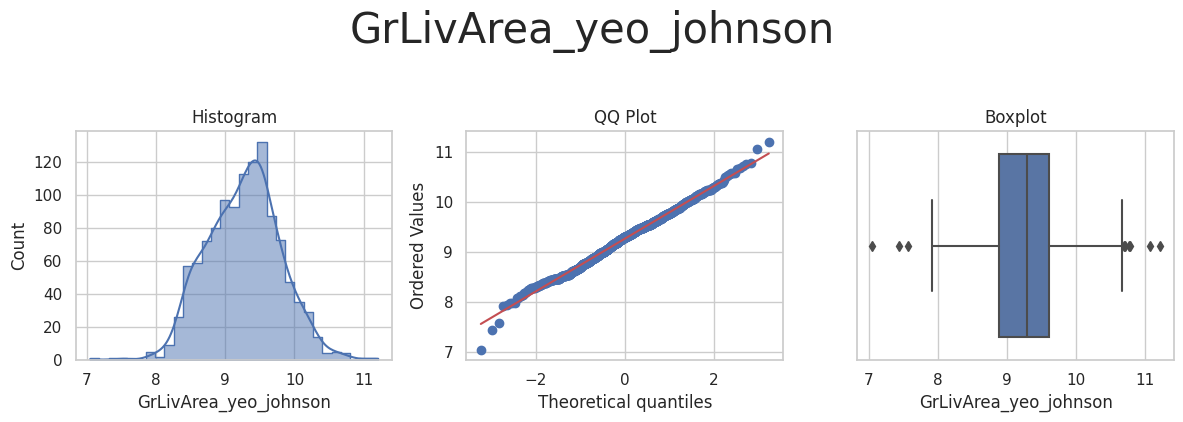



* Variable Analyzed: LotArea
* Applied transformation: ['LotArea_log_e', 'LotArea_log_10', 'LotArea_reciprocal', 'LotArea_power', 'LotArea_box_cox', 'LotArea_yeo_johnson'] 



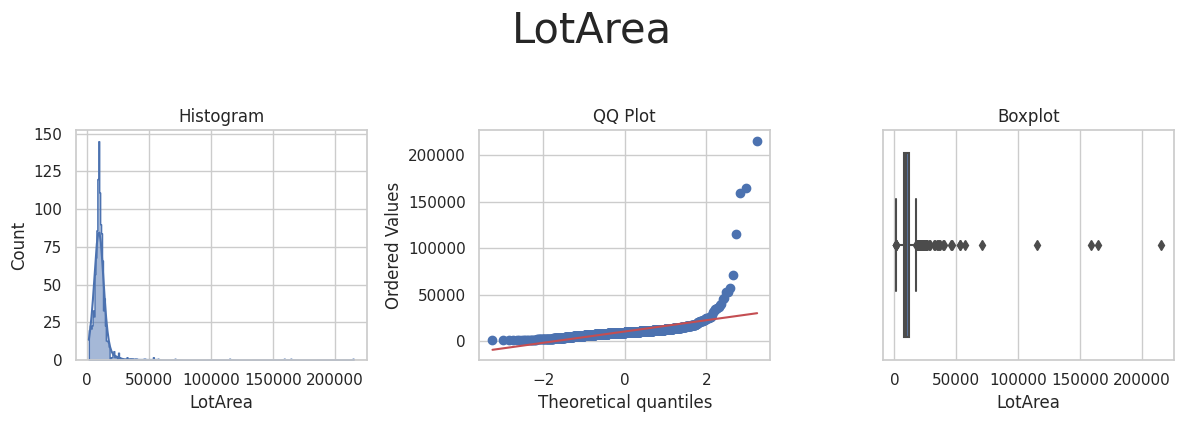

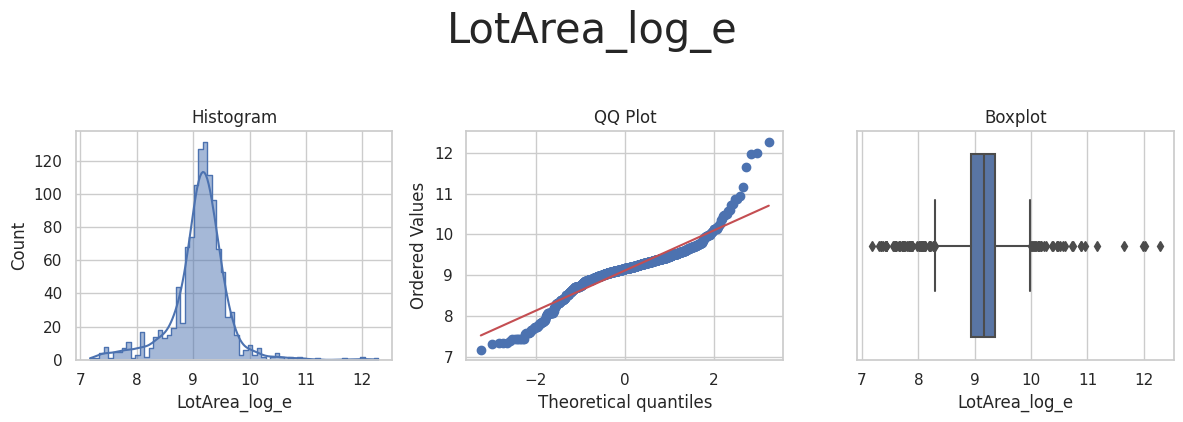

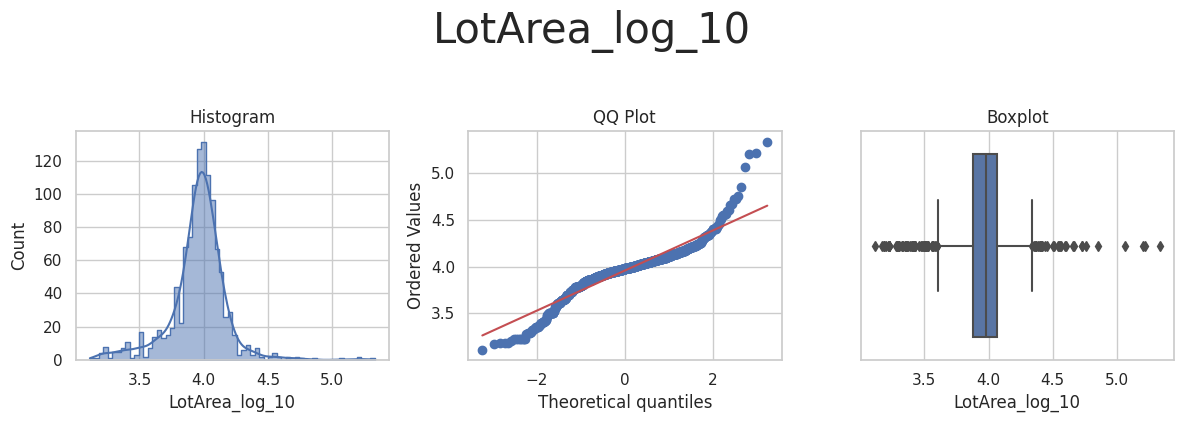

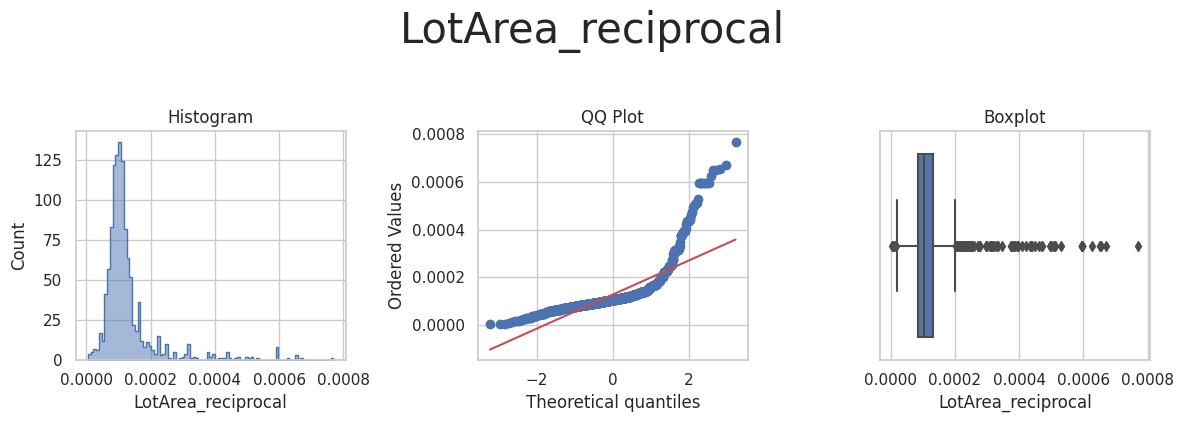

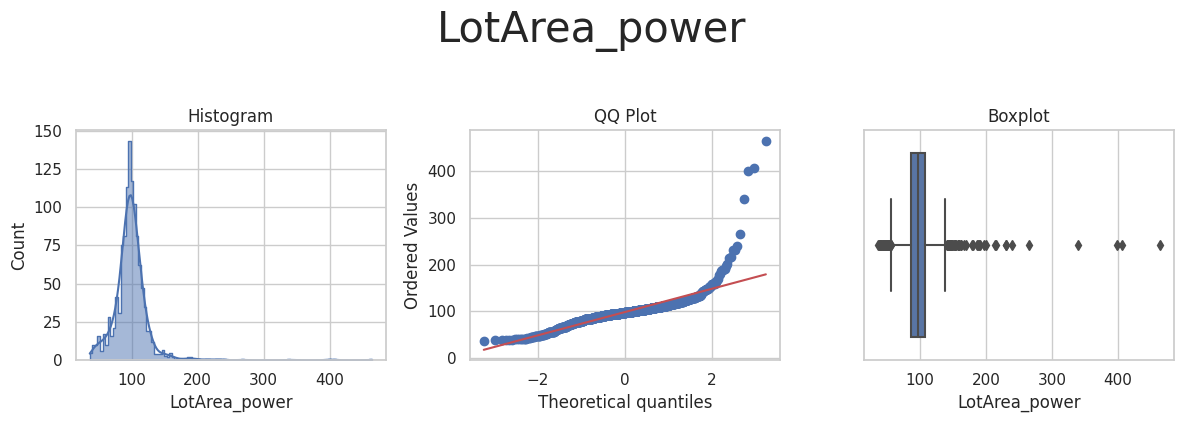

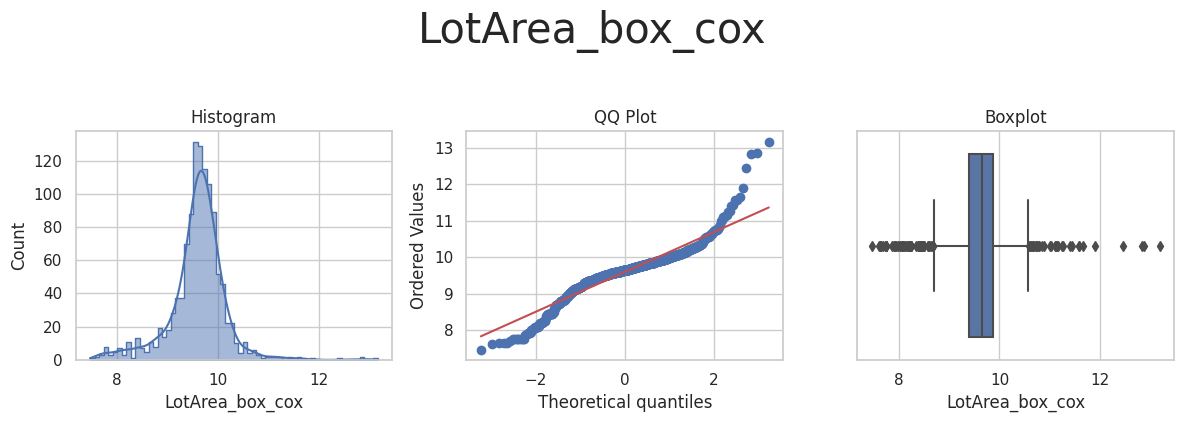

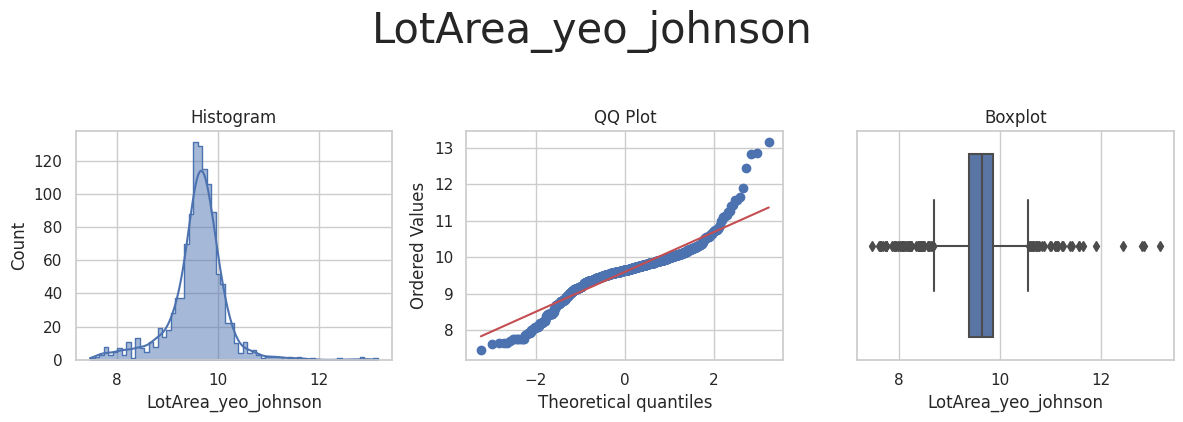



* Variable Analyzed: LotFrontage
* Applied transformation: ['LotFrontage_log_e', 'LotFrontage_log_10', 'LotFrontage_reciprocal', 'LotFrontage_power', 'LotFrontage_box_cox', 'LotFrontage_yeo_johnson'] 



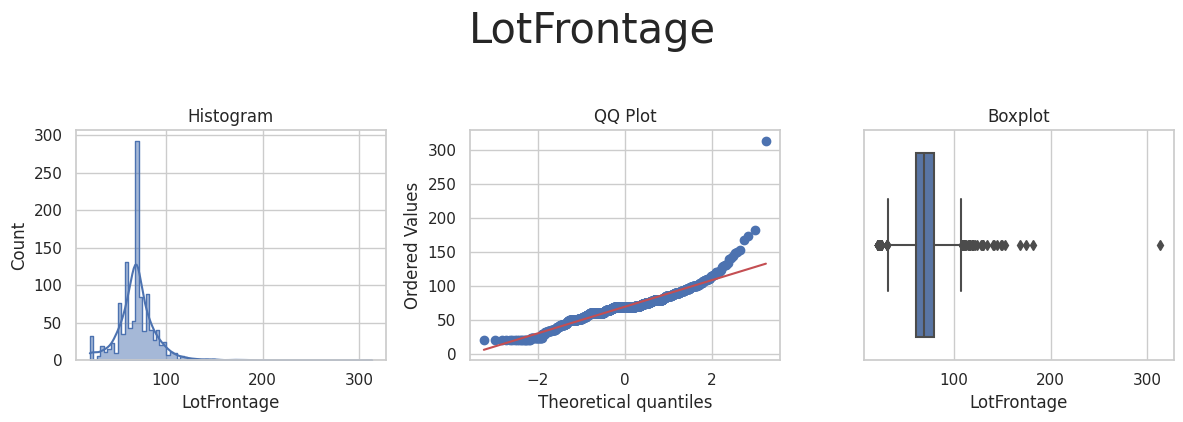

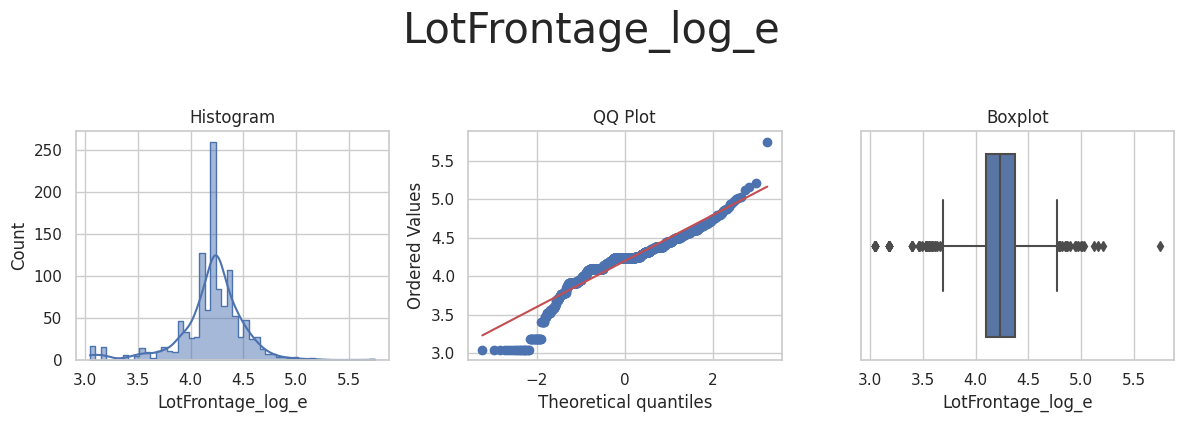

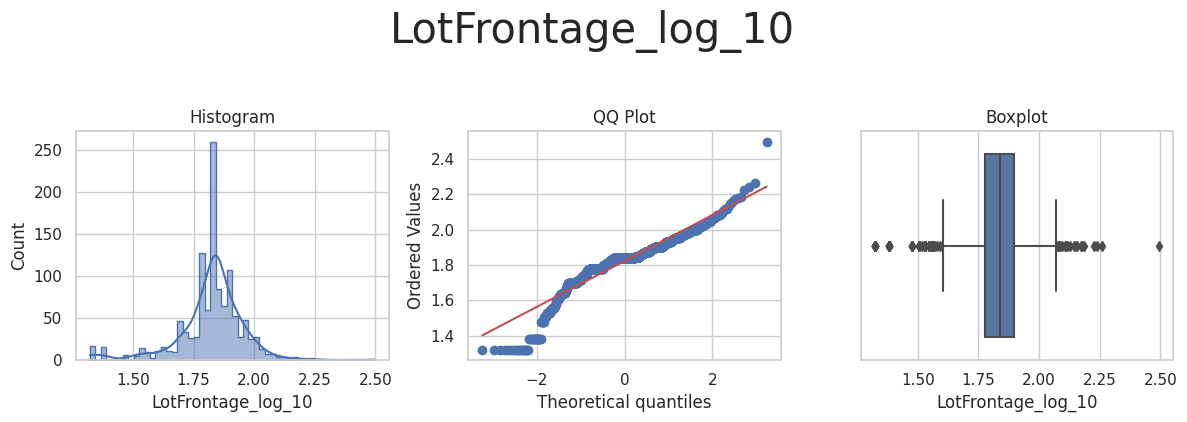

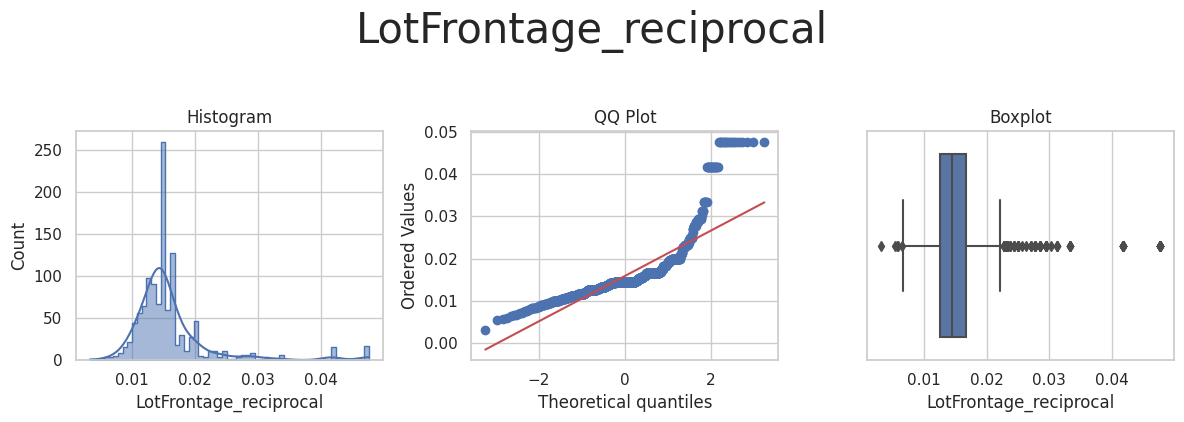

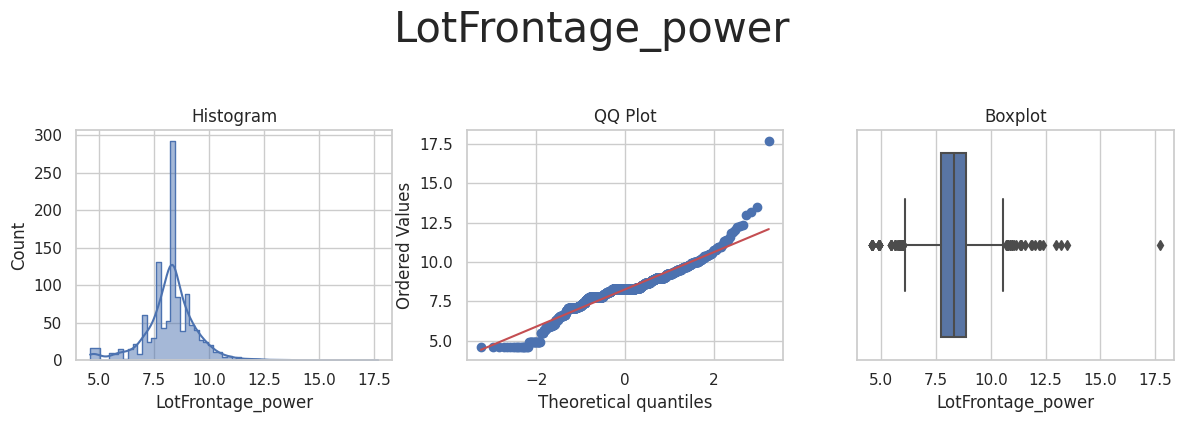

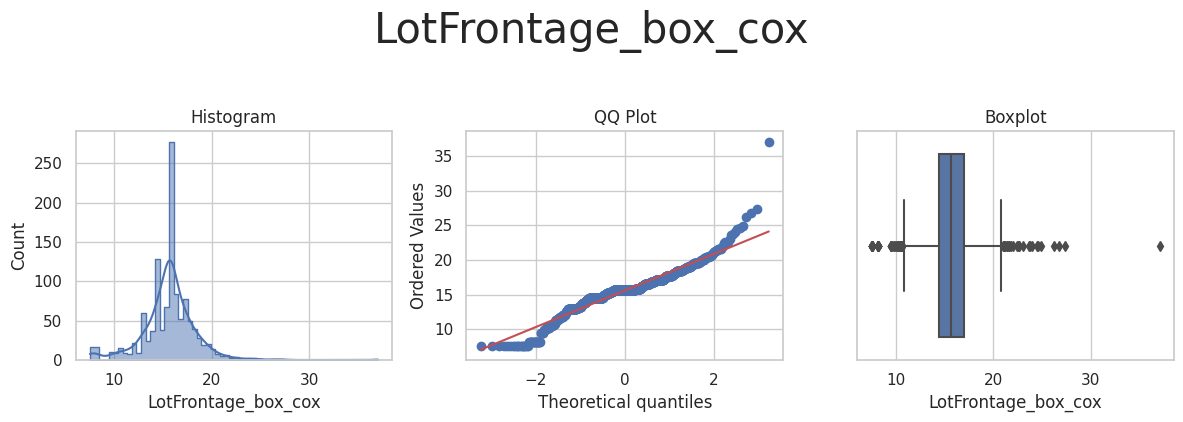

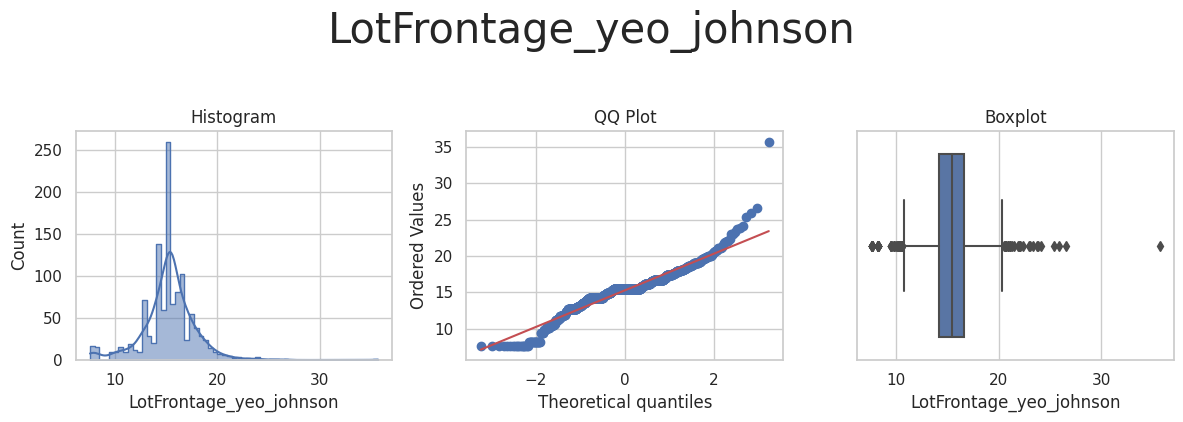



* Variable Analyzed: MasVnrArea
* Applied transformation: ['MasVnrArea_power', 'MasVnrArea_yeo_johnson'] 



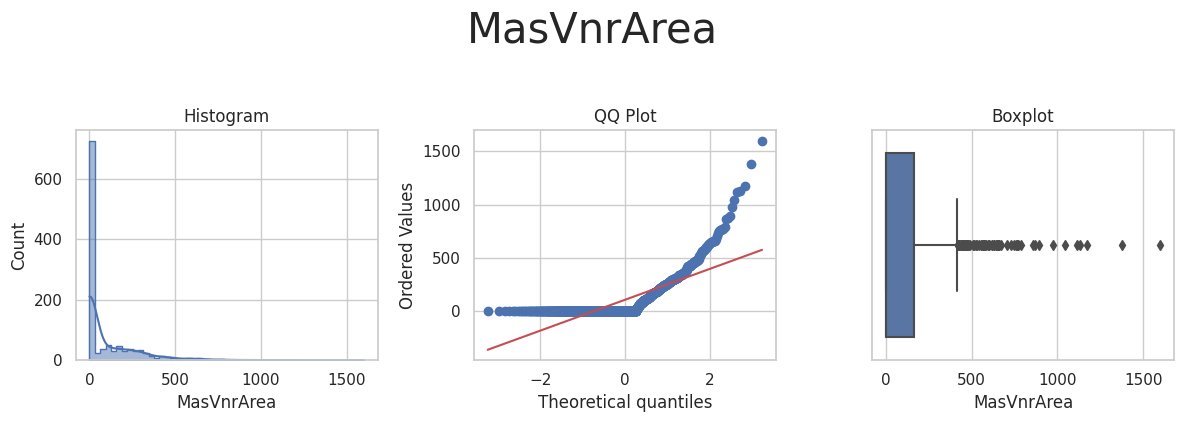

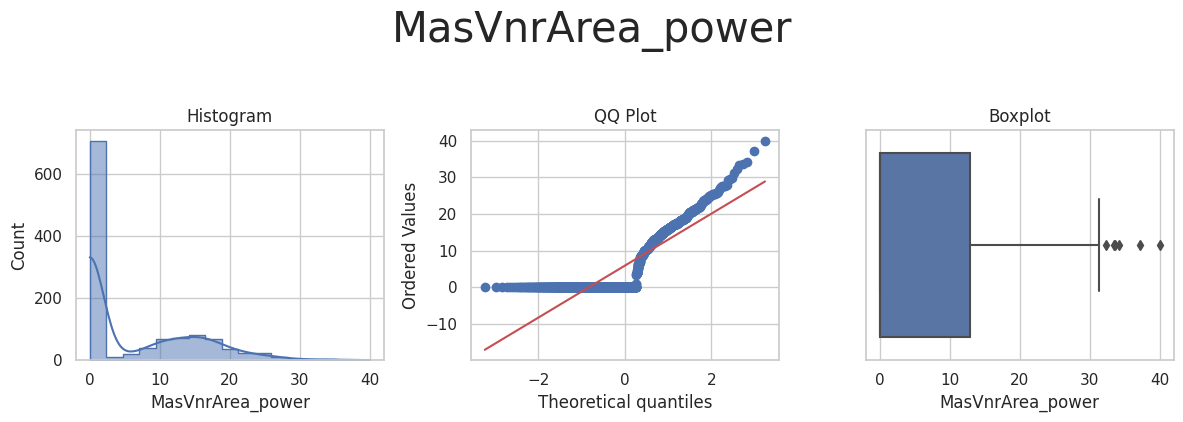

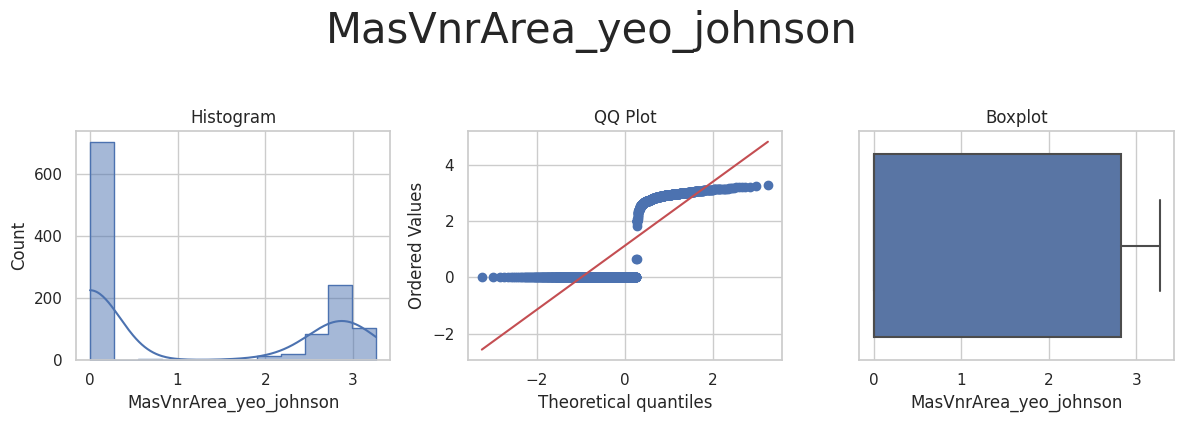



* Variable Analyzed: OpenPorchSF
* Applied transformation: ['OpenPorchSF_power', 'OpenPorchSF_yeo_johnson'] 



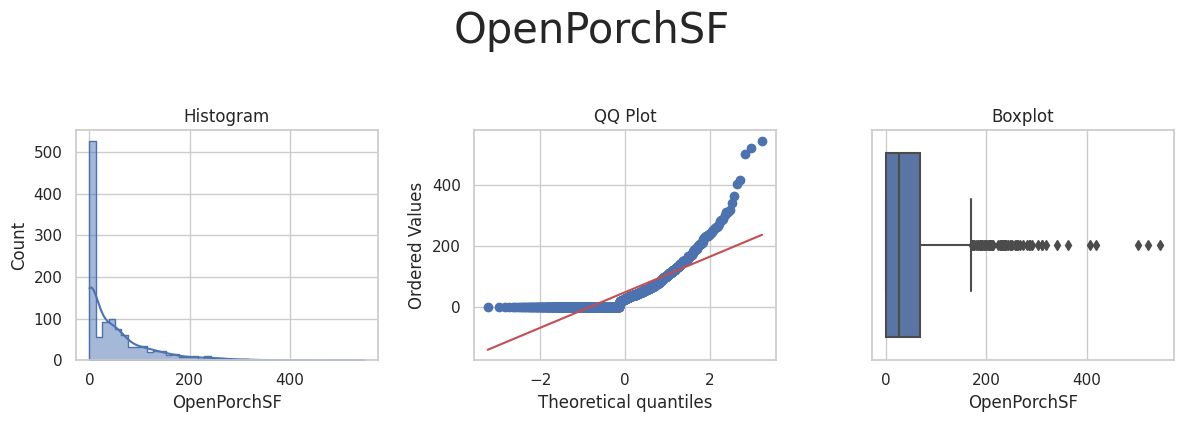

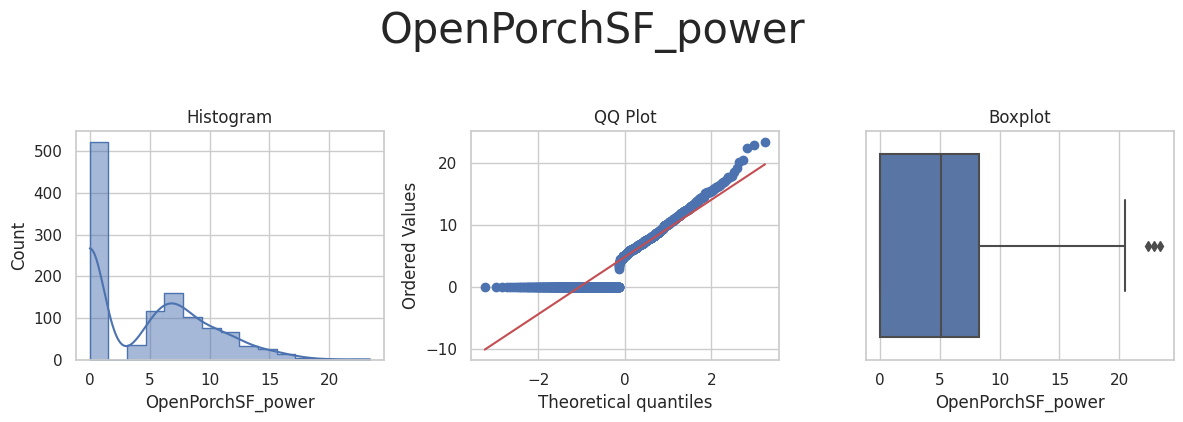

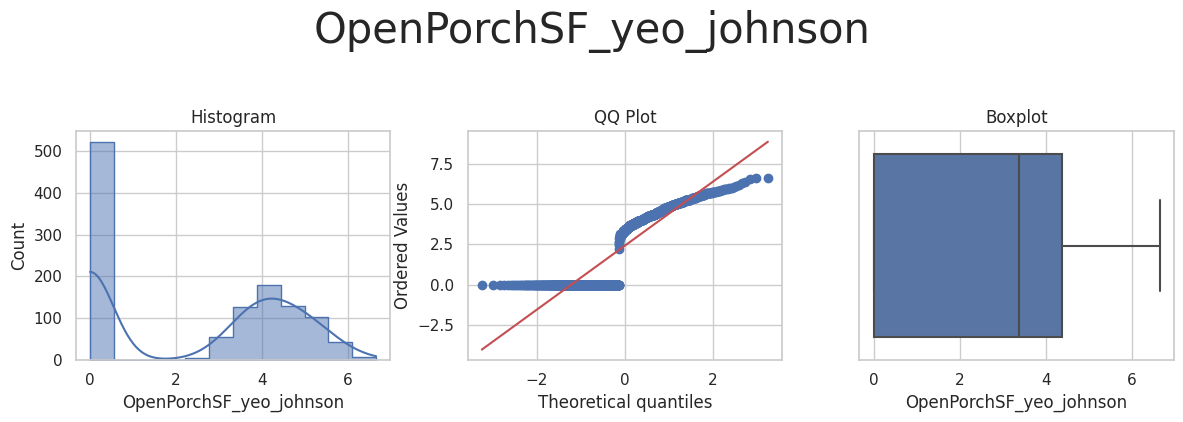



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_power', 'TotalBsmtSF_yeo_johnson'] 



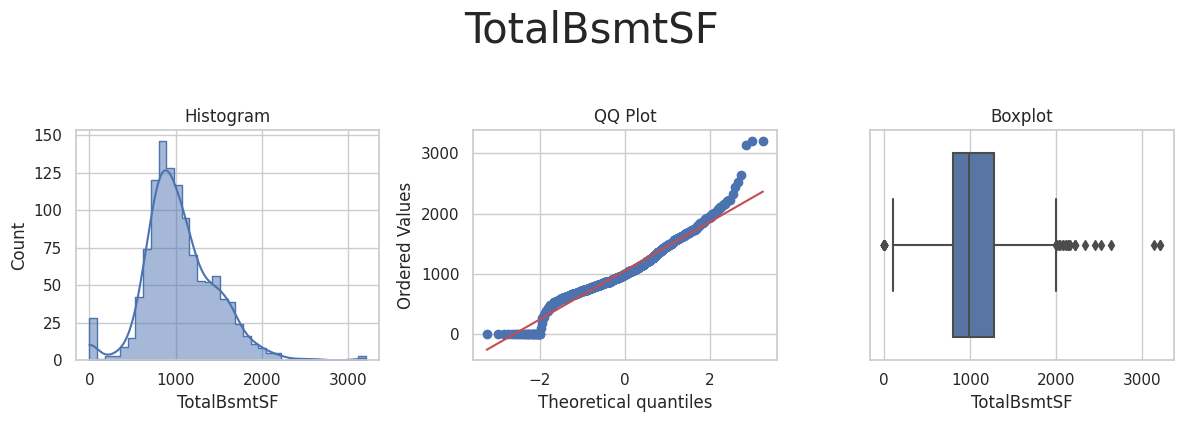

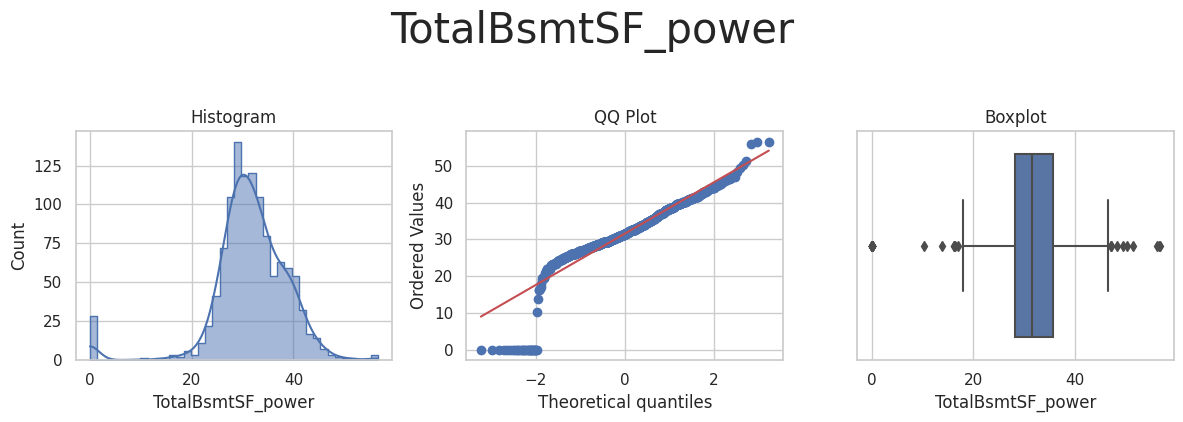

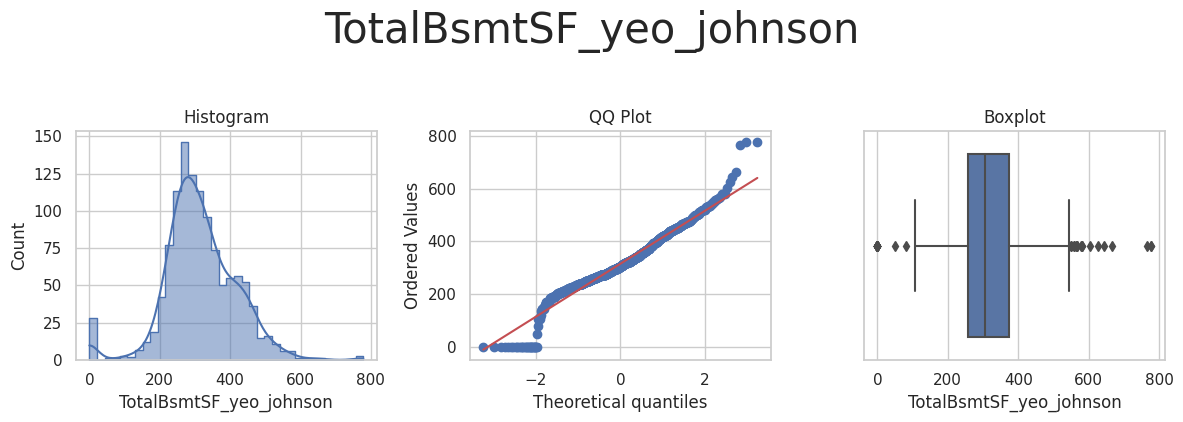

In [21]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

Analysis: 

`1stFlrSF`, `GrLivArea`, `LotArea` and `LotFrontage` showed a good distributed with `log_e` and `yeo_johnson`

`2ndFlrSF`, `BsmtFinSF1`, `BsmtUnfSF`, `GarageArea`, `MasVnrArea`, `OpenPorchSF` showed a good distribution with `power`. This transformer keeps a good balance with the zeros and normalizes the rest of the data.  


* Step 4 - Apply the selected transformation to the Train and Test set

In [22]:
encoder = vt.LogTransformer(variables = [
    '1stFlrSF', 
    'GrLivArea', 
    'LotArea', 
    'LotFrontage', ])
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


In [23]:
encoder = vt.PowerTransformer(
    variables = ['2ndFlrSF', 
        'BsmtFinSF1', 
        'BsmtUnfSF', 
        'GarageArea', 
        'MasVnrArea',
        'OpenPorchSF',
        'TotalBsmtSF'
         ])
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


Now we will polish our data by using Outlier Trimmer and Winsorier methods. It's important to handle certain values that might affect the result of our data. In this case we believe that some houses may have a vast living area but the properties have been abandoned or have not received the adequate maintanance and this affects the overall quality and sale price. 

#### `Outlier Trimmer`

* Step 1: Select variable(s)

In [24]:
from feature_engine.outliers import OutlierTrimmer

variables_engineering = ['SalePrice', 'GrLivArea']
variables_engineering

['SalePrice', 'GrLivArea']

* Step 2: Create a separate dataframe, with your variable(s)

In [26]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head()

SalePrice  GrLivArea
0     314813   7.510978
1     109500   6.795706
2     163500   6.871091
3     271000   7.431892
4     205000   7.340187

* Step 3: Create engineered variables(s) apply the transformation(s), assess engineered variables distribution and select most suitable method

In [27]:
df_transformed = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, variables=variables_engineering)
df_transformed = df_transformed.fit_transform(df_engineering)

In [28]:
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}")
    print("\n")

========= Before Transformation ========= 



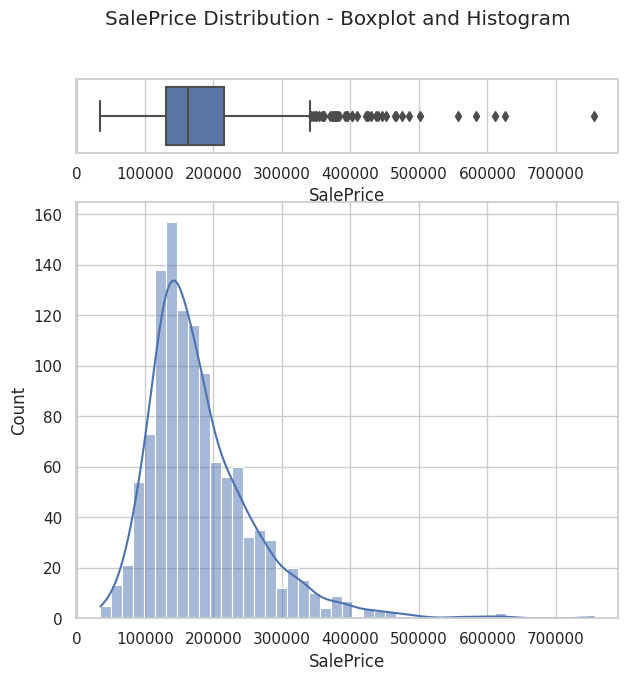

This is the range where a datapoint is not an outlier: from 2500.0 to 342500.0




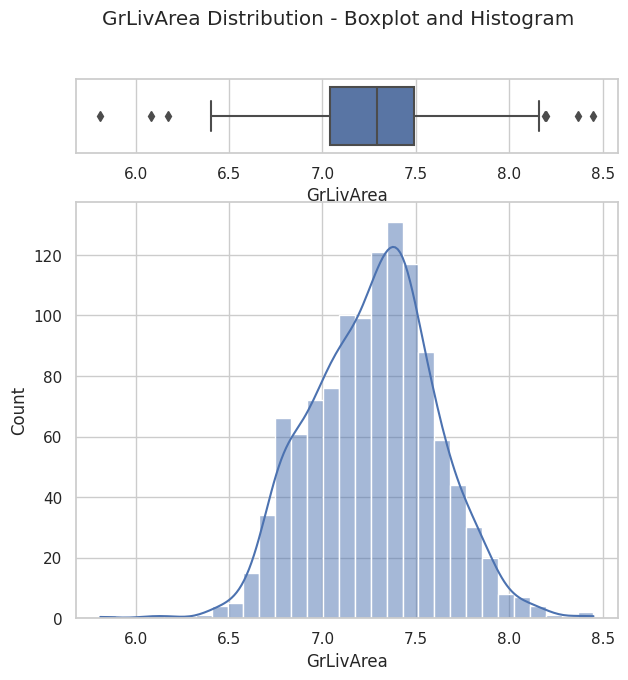

This is the range where a datapoint is not an outlier: from 6.36 to 8.17




 ========= After Transformation =========


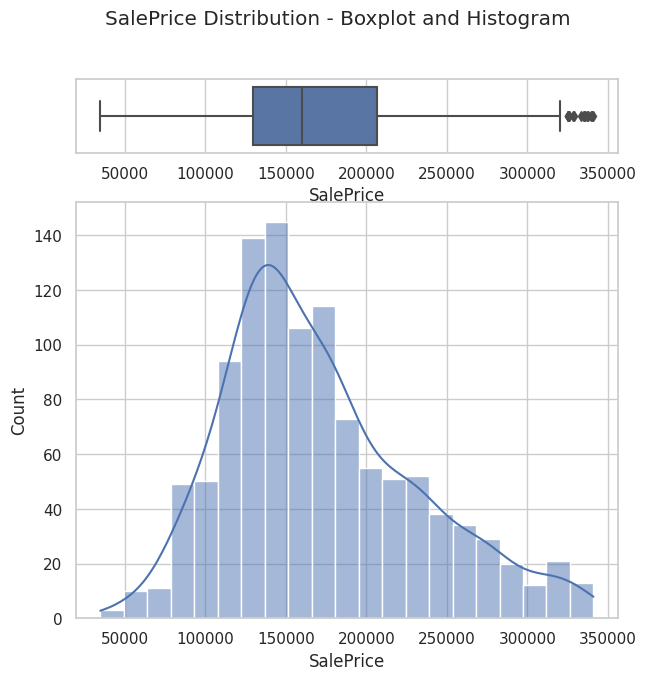

This is the range where a datapoint is not an outlier: from 13325.0 to 323125.0




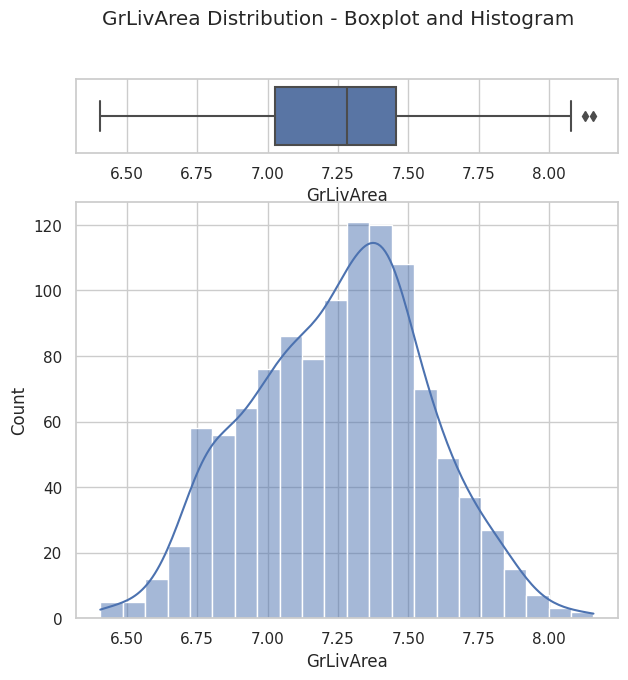

This is the range where a datapoint is not an outlier: from 6.38 to 8.1




In [29]:
print("========= Before Transformation ========= \n")
plot_histogram_and_boxplot(TrainSet[['SalePrice', 'GrLivArea']])
print("\n\n ========= After Transformation =========")
plot_histogram_and_boxplot(df=df_transformed)

* Step 4 - Apply the selected transformation to the Train and Test set


In [30]:
print(f"* The dataset has {len(TrainSet)} rows, considering outliers.")

transformer = OutlierTrimmer(
    variables=['SalePrice', 'GrLivArea'],
    tail = 'both',
    capping_method='iqr',
    fold=1.5
)

transformer.fit(TrainSet)

TrainSet, TestSet = transformer.transform(TrainSet) , transformer.transform(TestSet)


print(f"* Once it is transformed with OutlierTrimmer, dataset has {len(TrainSet)} rows")

* The dataset has 1168 rows, considering outliers.
* Once it is transformed with OutlierTrimmer, dataset has 1119 rows


#### `Winsorizer`

 Step 1: Select variable(s)

In [31]:
from feature_engine.outliers import Winsorizer

variables_engineering = ['SalePrice', 'GrLivArea']
variables_engineering

['SalePrice', 'GrLivArea']

* Step 2: Create a separate dataframe, with your variable(s)

In [32]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head()

SalePrice  GrLivArea
0     314813   7.510978
1     109500   6.795706
2     163500   6.871091
3     271000   7.431892
4     205000   7.340187

* Step 3: Create engineered variables(s) apply the transformation(s), assess engineered variables distribution and select most suitable method

* Variable Analyzed: SalePrice
* Applied transformation: ['SalePrice_iqr'] 



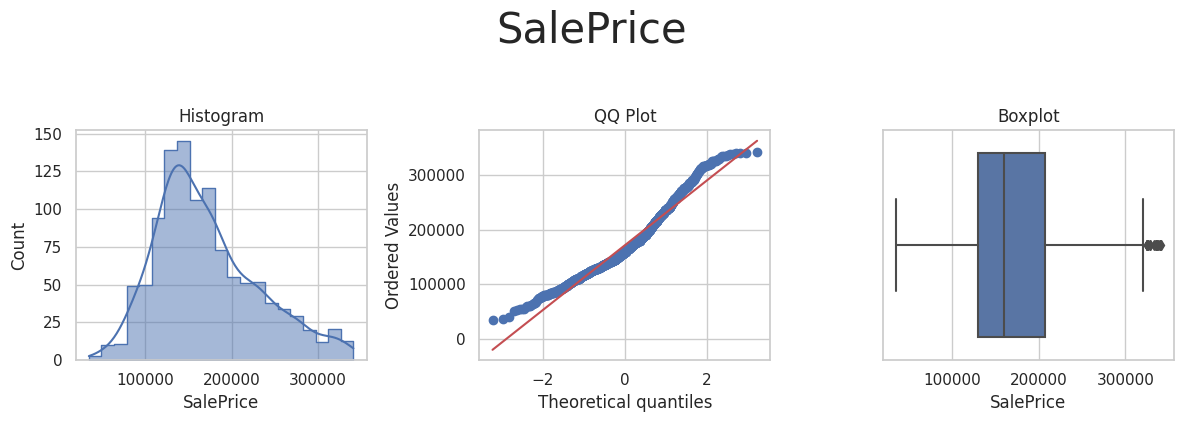

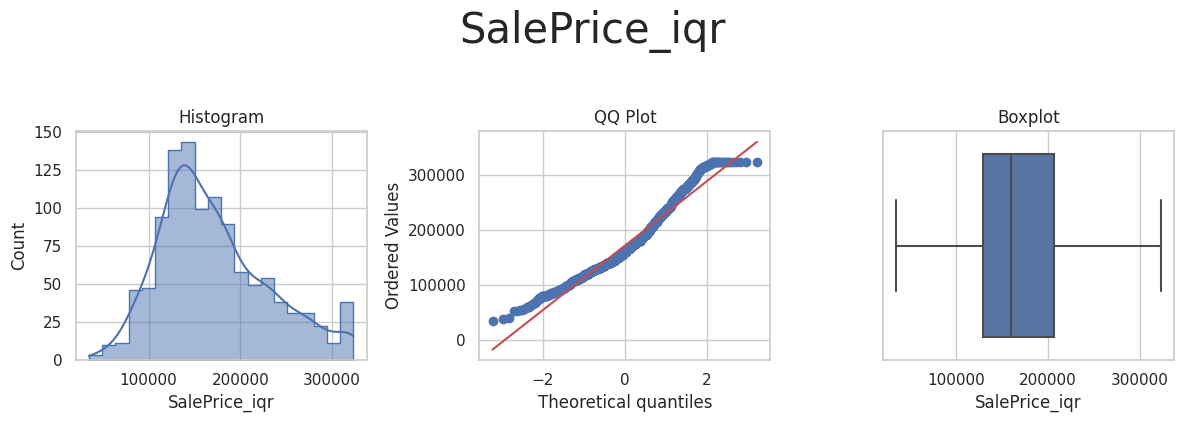



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_iqr'] 



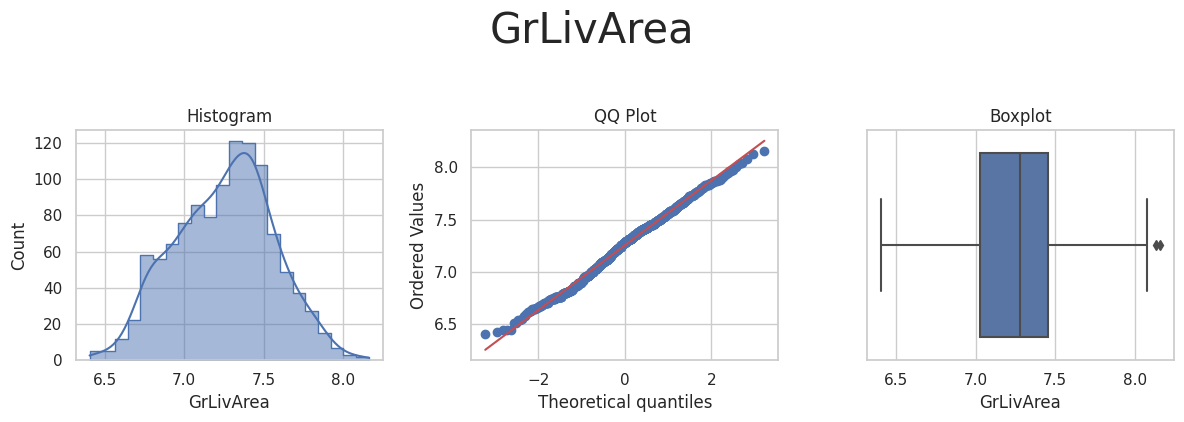

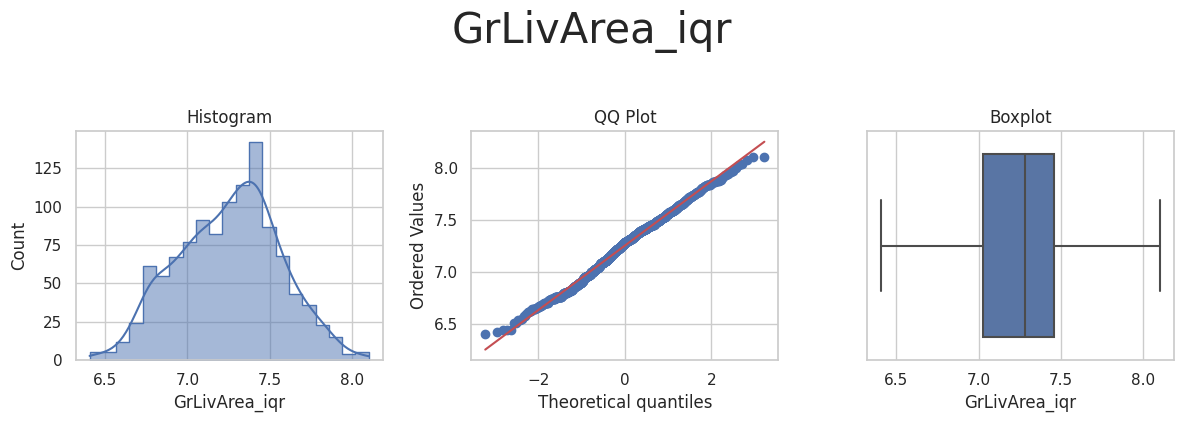

In [33]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='outlier_winsorizer')

* Step 4 - Apply the selected transformation to the Train and Test set

In [34]:
transformer = Winsorizer(
    capping_method='iqr', 
    tail='both', 
    fold=1.5, 
    variables=variables_engineering)
transformer.fit(TrainSet)

TrainSet, TestSet = transformer.transform(TrainSet) , transformer.transform(TestSet)

print("* Winsorizer transformation done!")

* Winsorizer transformation done!


#### `Smart Correlation Selection`

* Step 1: Select variable(s)

All variables are needed for this transformer.

* Step 2: Create a separate dataframe, with your variable(s)


In [35]:
df_engineering = TrainSet.copy()
df_engineering.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0  7.510978       0.0           3.0             0    6.928203             0   
1  6.795706       0.0           2.0             1    0.000000             0   
2  6.871091       0.0           2.0             1   26.702060             1   
3  7.431892       0.0           3.0             1   34.899857             2   
4  7.340187       0.0           3.0             1    0.000000             0   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...   LotArea  \
0  42.118879   27.820855             0       2007.0  ...  9.366831   
1  29.899833   17.549929             0       1962.0  ...  8.794825   
2  12.767145   20.784610             0       1921.0  ...  9.500020   
3  18.708287   29.274562             1       2002.0  ...  9.492884   
4  39.255573   29.034462             1       2001.0  ...  9.525443   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0     4.499810   21.260292    10.392305            5            9   
1     4.094345    0.000000     0.000000            5            5   
2     4.382027    0.000000     0.000000            7            5   
3     4.234107   12.165525     7.681146            5            8   
4     4.770685   12.247449     9.000000            5            7   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0    42.684892       2007          2007   314813.0  
1    29.899833       1962          1962   109500.0  
2    29.597297       1921          2006   163500.0  
3    39.597980       2002          2002   271000.0  
4    39.255573       2001          2002   205000.0  

[5 rows x 22 columns]

* Step 3: Create engineered variables(s) applying the transformation(s)

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.8,selection_method="variance", missing_values='ignore')

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'1stFlrSF', 'TotalBsmtSF'}, {'GarageYrBlt', 'YearBuilt'}]

In [ ]:
corr_sel.features_to_drop_

## Conclusions 

Feature Engineering Transformers:

* OrdinalEncoder(encoding_method='arbitrary', variables = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'])

* Numerical Transformation

  * vt.LogTransformer(variables = ['1stFlrSF', 'GrLivArea', 'LotArea', 'LotFrontage'])

  * vt.PowerTransformer(variables = ['2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF']) 

* Winsorizer: ['SalePrice', 'GrLivArea']
  
* SmartCorrelatedSelection - Features to drop: 
['1stFlrSF', 'GarageYrBlt']
